## 1. Importing Libraries and Loading Data

In [3]:
# Import The Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./Loan_Default.csv')

In [6]:
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [7]:
df.tail()

ID  year loan_limit             Gender approv_in_adv loan_type  \
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
148665           p3                l1        nopc                  nob/c  ...   
148666           p1                l1        nopc                  nob/c  ...   
148667           p4                l1        nopc                  nob/c  ...   
148668           p4                l1        nopc                  nob/c  ...   
148669           p3                l1        nopc                  nob/c  ...   

        credit_type  Credit_Score  co-applicant_credit_type    age  \
148665          CIB           659                       EXP  55-64   
148666          CIB           569                       CIB  25-34   
148667          CIB           702                       EXP  45-54   
148668          EXP           737                       EXP  55-64   
148669          CIB           830                       CIB  45-54   

        submission_of_application        LTV Region Security_Type  Status  \
148665                    to_inst  71.792763  south        direct       0   
148666                   not_inst  74.428934  south        direct       0   
148667                   not_inst  61.332418  North        direct       0   
148668                    to_inst  70.683453  North        direct       0   
148669                   not_inst  72.849462  North        direct       0   

       dtir1  
148665  48.0  
148666  15.0  
148667  49.0  
148668  29.0  
148669  44.0  

[5 rows x 34 columns]

In [8]:
df.shape

(148670, 34)

In [9]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [11]:
df2 = df.copy()

## 2. Initial Data Understanding

Separating Features by Data Type
To make preprocessing easier, we'll create separate lists and DataFrames for our categorical (object) and numerical (non-object) columns. This helps us apply different transformations (like imputation or scaling) to the correct features.

In [12]:
# To Create A DataFrame of Categorical Values 
df_obj = df.copy()
obj_cols = [col for col in df_obj.columns if df_obj[col].dtype == 'object']
print(obj_cols)
df_obj = df_obj[obj_cols]
df_obj.shape
df_obj.head()

['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0         cf  Sex Not Available         nopre     type1           p1   
1         cf               Male         nopre     type2           p1   
2         cf               Male           pre     type1           p1   
3         cf               Male         nopre     type1           p4   
4         cf              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial Neg_ammortization  \
0                l1        nopc                  nob/c           not_neg   
1                l1        nopc                    b/c           not_neg   
2                l1        nopc                  nob/c           neg_amm   
3                l1        nopc                  nob/c           not_neg   
4                l1        nopc                  nob/c           not_neg   

  interest_only  ... construction_type occupancy_type Secured_by total_units  \
0       not_int  ...                sb             pr       home          1U   
1       not_int  ...                sb             pr       home          1U   
2       not_int  ...                sb             pr       home          1U   
3       not_int  ...                sb             pr       home          1U   
4       not_int  ...                sb             pr       home          1U   

  credit_type co-applicant_credit_type    age submission_of_application  \
0         EXP                      CIB  25-34                   to_inst   
1        EQUI                      EXP  55-64                   to_inst   
2         EXP                      CIB  35-44                   to_inst   
3         EXP                      CIB  45-54                  not_inst   
4        CRIF                      EXP  25-34                  not_inst   

  Region Security_Type  
0  south        direct  
1  North        direct  
2  south        direct  
3  North        direct  
4  North        direct  

[5 rows x 21 columns]

In [13]:
#To Create A Dataframe of Non-Categorical Values
df_num = df.copy()
num_cols = [col for col in df_num.columns if df_num[col].dtype != 'object']
print(num_cols)
df_num = df_num[num_cols]
df_num.shape
df_num.head()

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


ID  year  loan_amount  rate_of_interest  Interest_rate_spread  \
0  24890  2019       116500               NaN                   NaN   
1  24891  2019       206500               NaN                   NaN   
2  24892  2019       406500              4.56                0.2000   
3  24893  2019       456500              4.25                0.6810   
4  24894  2019       696500              4.00                0.3042   

   Upfront_charges   term  property_value   income  Credit_Score        LTV  \
0              NaN  360.0        118000.0   1740.0           758  98.728814   
1              NaN  360.0             NaN   4980.0           552        NaN   
2            595.0  360.0        508000.0   9480.0           834  80.019685   
3              NaN  360.0        658000.0  11880.0           587  69.376900   
4              0.0  360.0        758000.0  10440.0           602  91.886544   

   Status  dtir1  
0       1   45.0  
1       1    NaN  
2       0   46.0  
3       0   42.0  
4       0   39.0

## 3. Data Cleaning and Exploratory Analysis

### Checking Unique Values and Missing Data
We'll start our cleaning process by inspecting the unique values in each column to spot any inconsistencies.

Then, we'll get a count of all missing (NaN) values for each column and use df.describe() to get summary statistics for the numerical features, which helps in understanding their distribution, scale, and potential outliers.

In [14]:
# Unique Values of Each Columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print("\n")

Unique values for ID:
[ 24890  24891  24892 ... 173557 173558 173559]


Unique values for year:
[2019]


Unique values for loan_limit:
['cf' nan 'ncf']


Unique values for Gender:
['Sex Not Available' 'Male' 'Joint' 'Female']


Unique values for approv_in_adv:
['nopre' 'pre' nan]


Unique values for loan_type:
['type1' 'type2' 'type3']


Unique values for loan_purpose:
['p1' 'p4' 'p3' 'p2' nan]


Unique values for Credit_Worthiness:
['l1' 'l2']


Unique values for open_credit:
['nopc' 'opc']


Unique values for business_or_commercial:
['nob/c' 'b/c']


Unique values for loan_amount:
[ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  326500   56500
  906500  496500  106500  126500  296500  176

In [15]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [16]:
df.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

### Visualizing Numerical Distributions
To better understand the distributions of our numerical features, we'll plot histograms for each one. This will help us visually identify skewness and outliers.

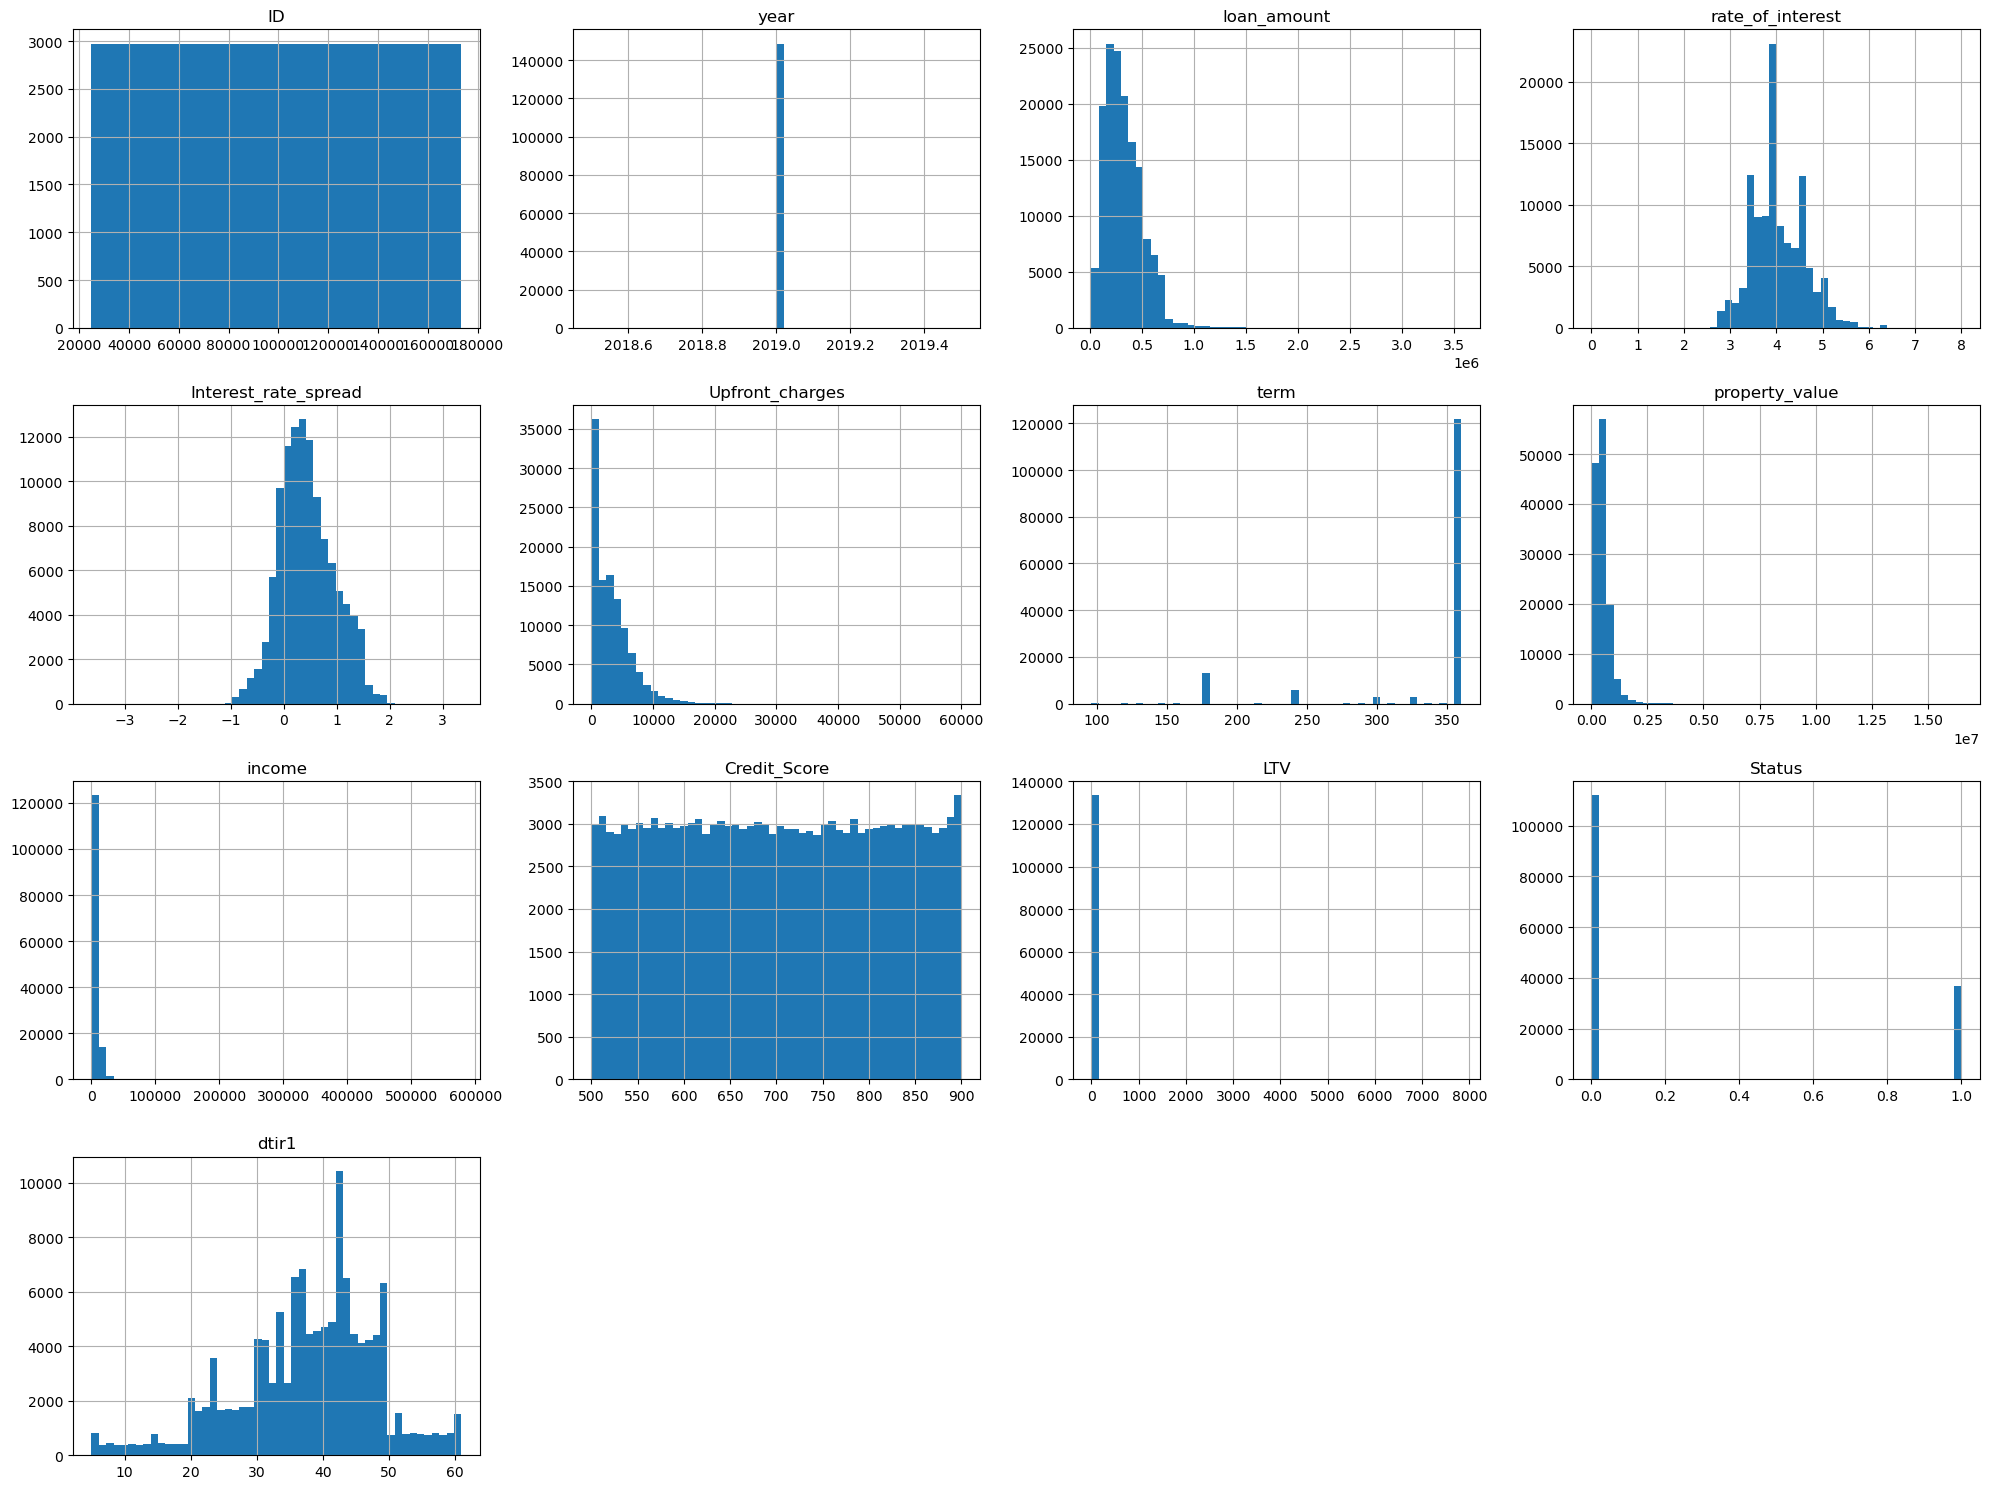

In [18]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Calculating Skewness
After visualizing, we'll quantify the skewness of each numerical feature. High skewness values (typically > 1 or < -1) indicate that a feature's distribution is not symmetrical, and it might benefit from a transformation (like log or square root).

In [19]:
# TO find skewness values
print(df[numeric_cols].skew().sort_values(ascending=False))

LTV                     120.615337
income                   17.307695
property_value            4.586276
Upfront_charges           1.754076
loan_amount               1.666998
Status                    1.176762
rate_of_interest          0.388406
Interest_rate_spread      0.280762
Credit_Score              0.004767
year                      0.000000
ID                        0.000000
dtir1                    -0.551465
term                     -2.174822
dtype: float64


### Finding Relationships between variables with Jointplots
To understand how numeric features interact with each other, we'll create jointplots for combinations of variables. These plots show both a scatter plot (for the relationship) and histograms (for individual distributions). We'll use a sample of 5000 rows to speed up plotting.

In [20]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['ID', 'year']]

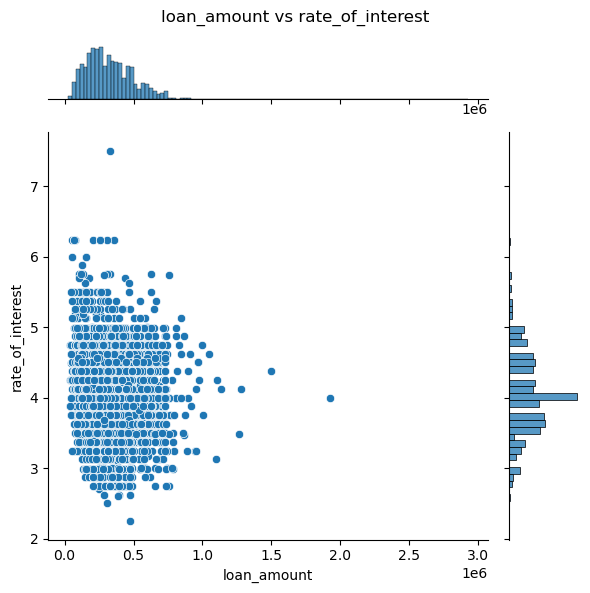

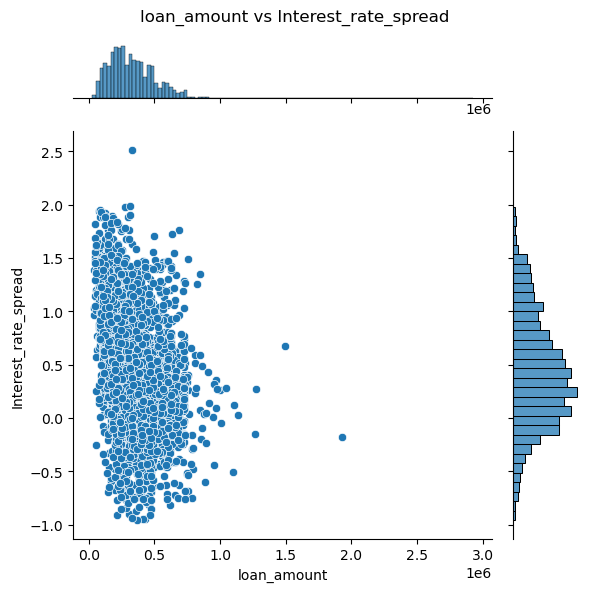

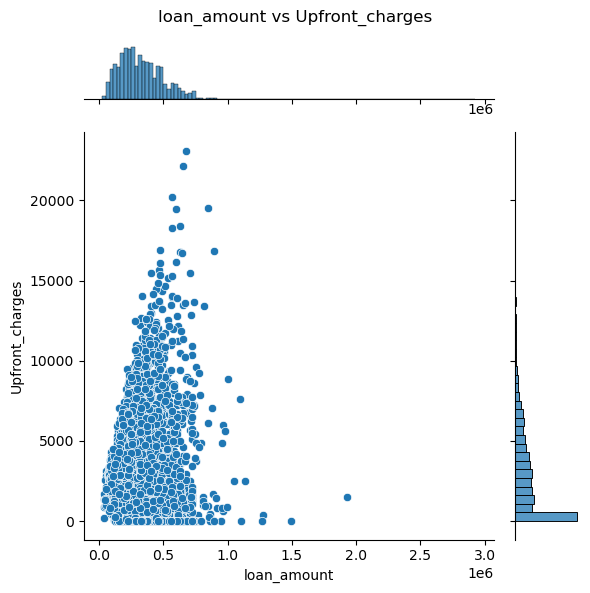

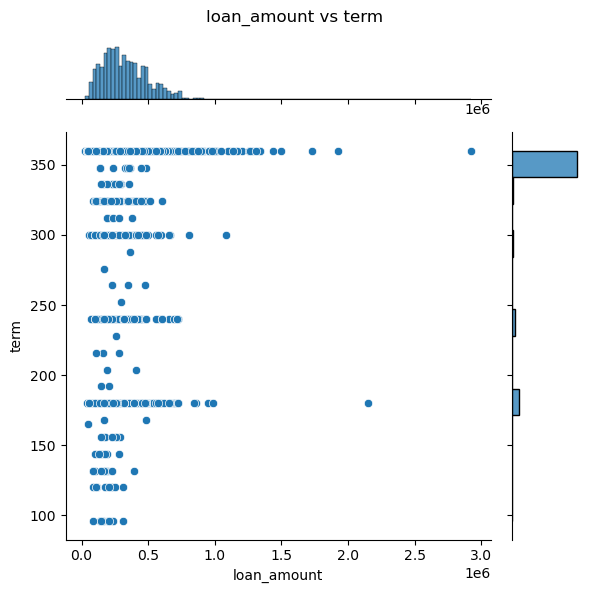

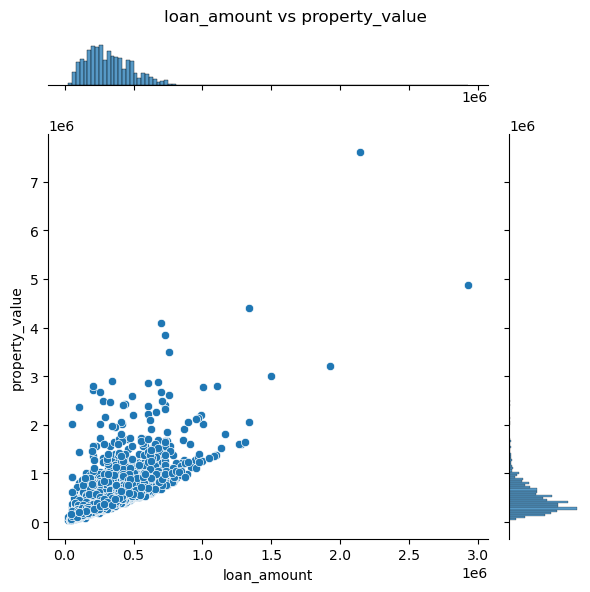

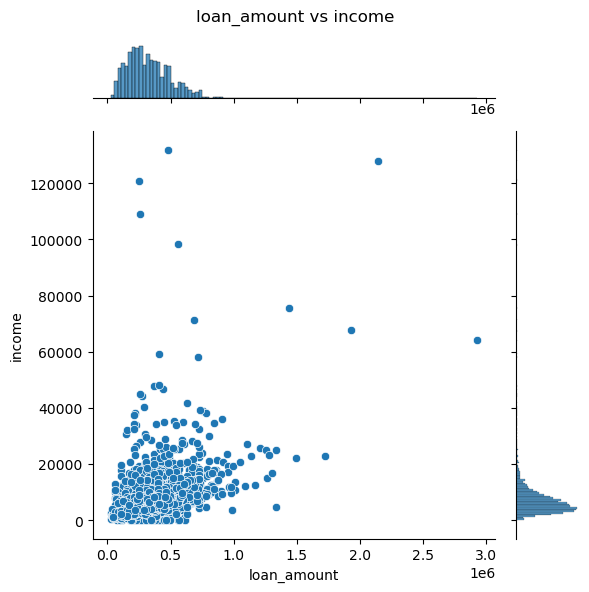

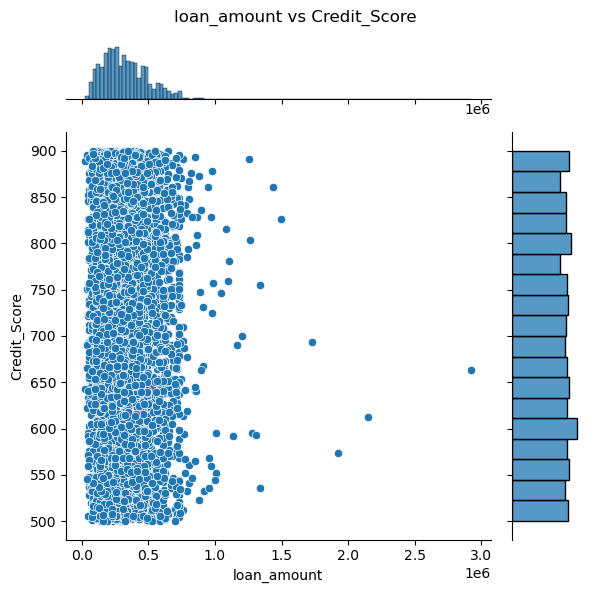

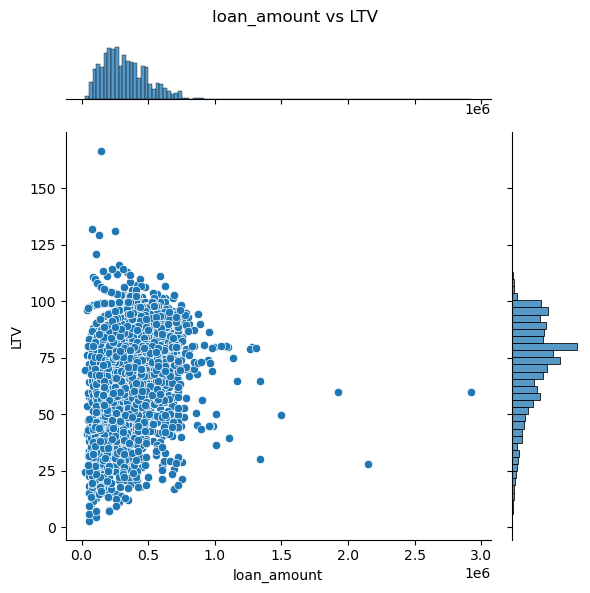

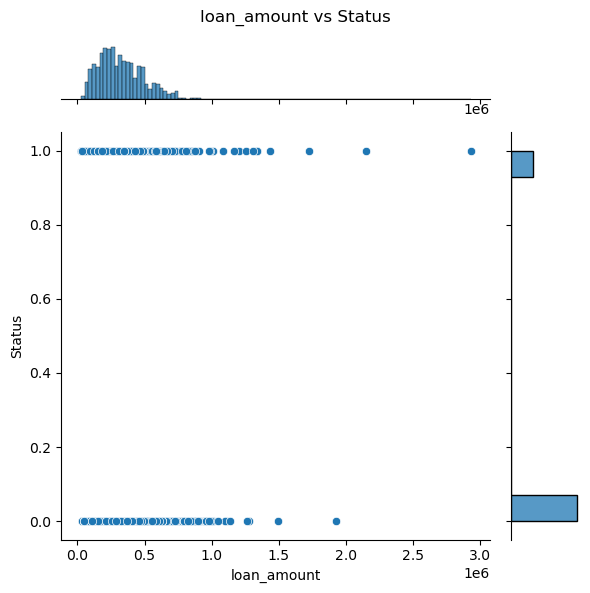

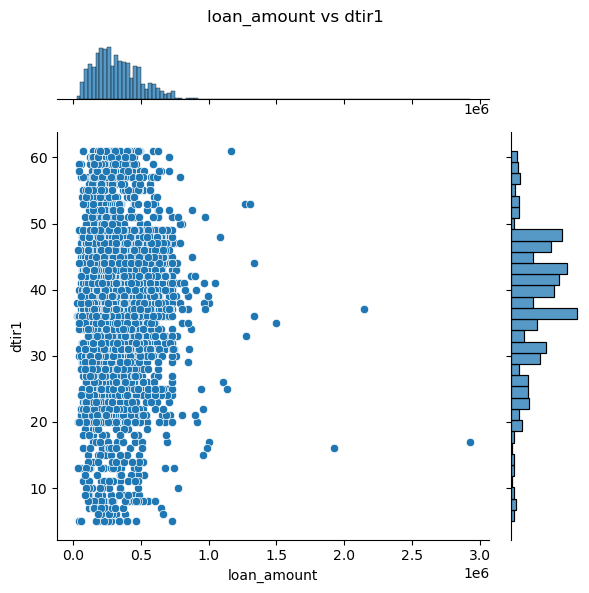

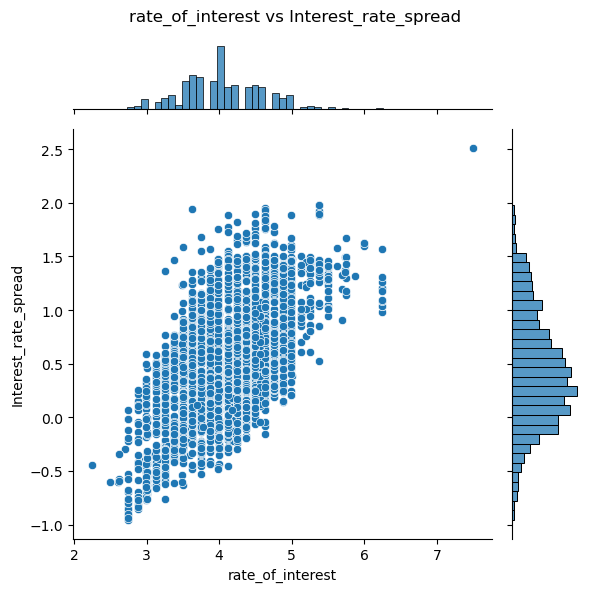

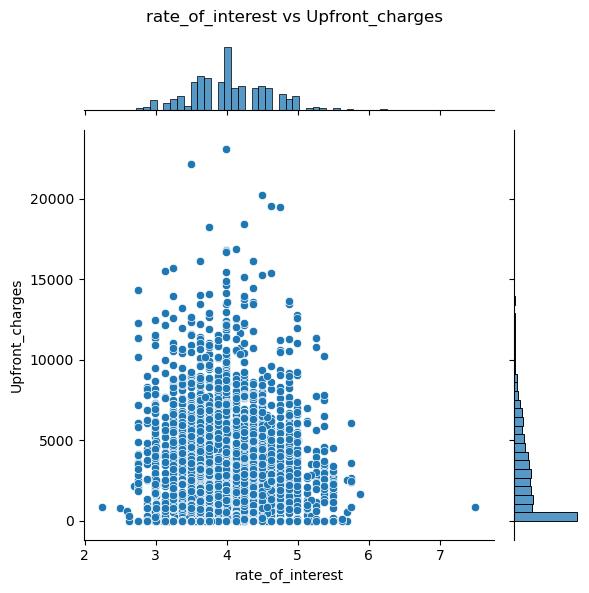

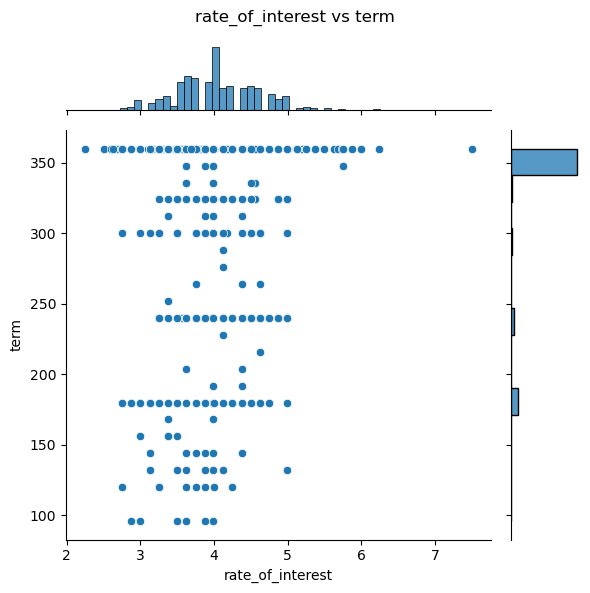

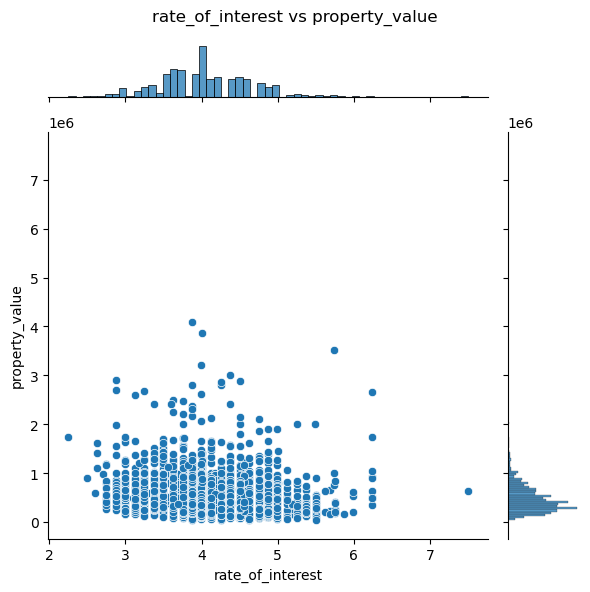

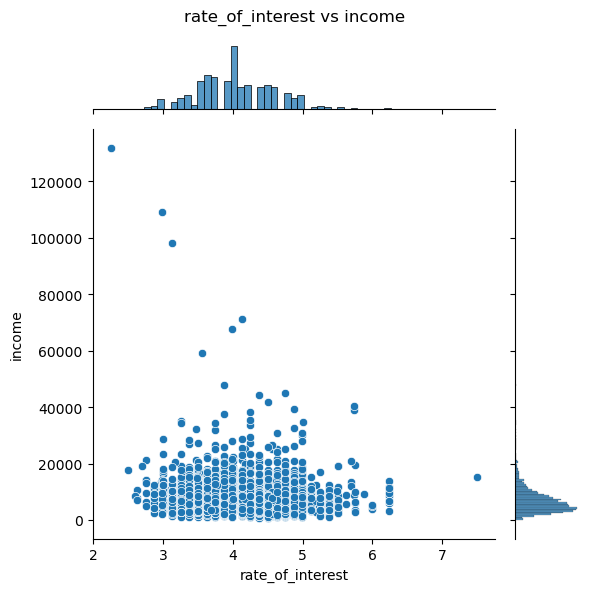

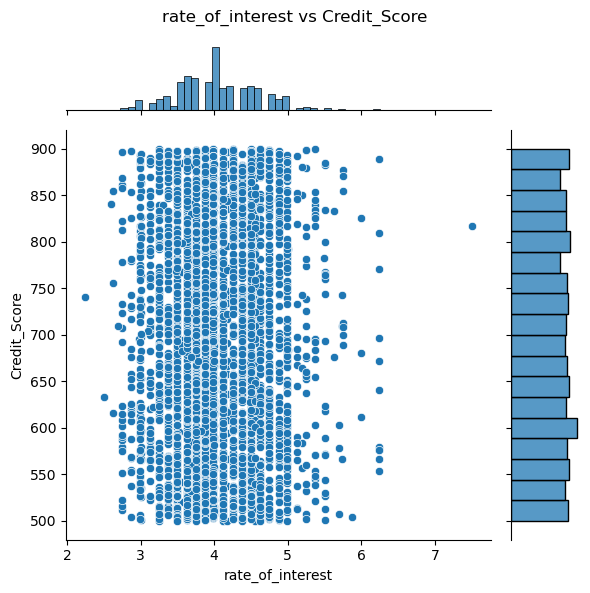

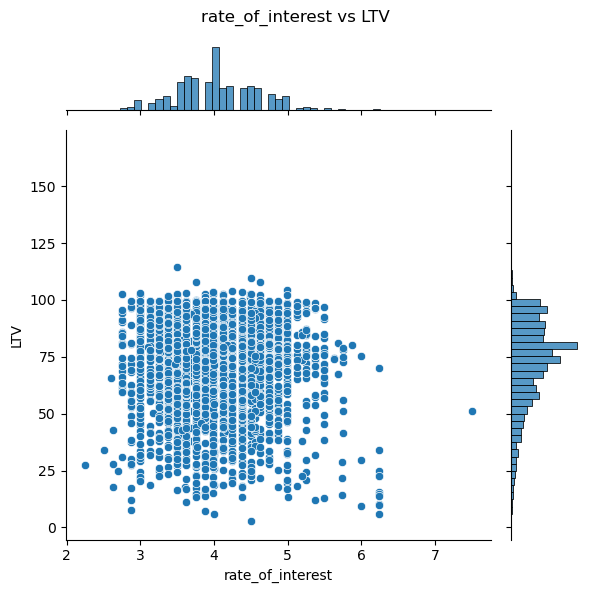

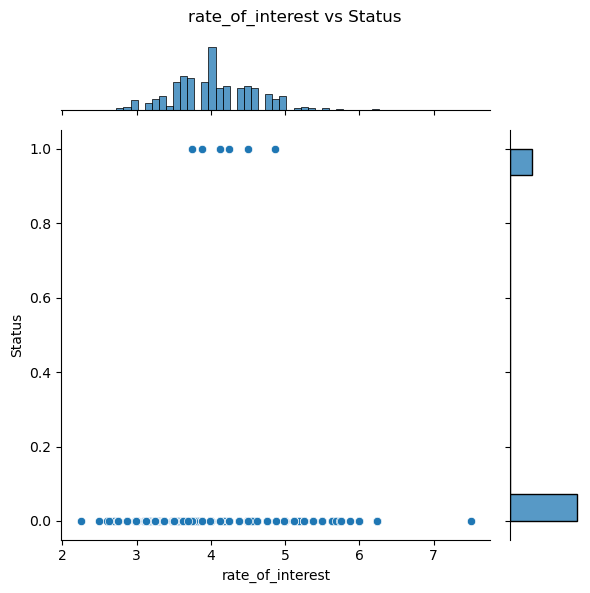

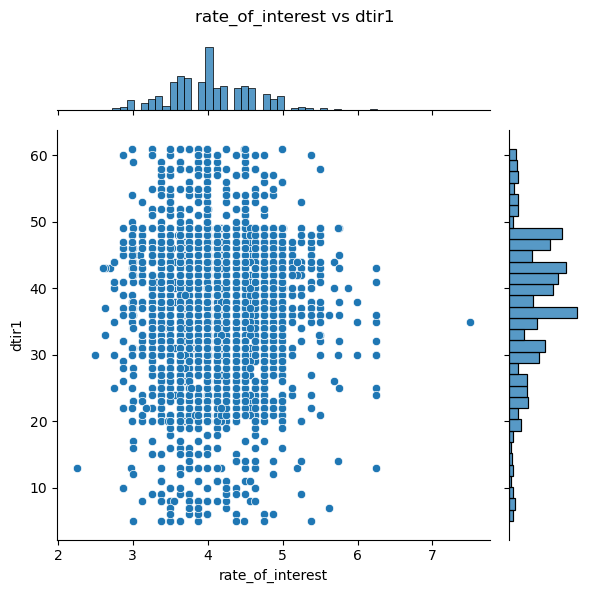

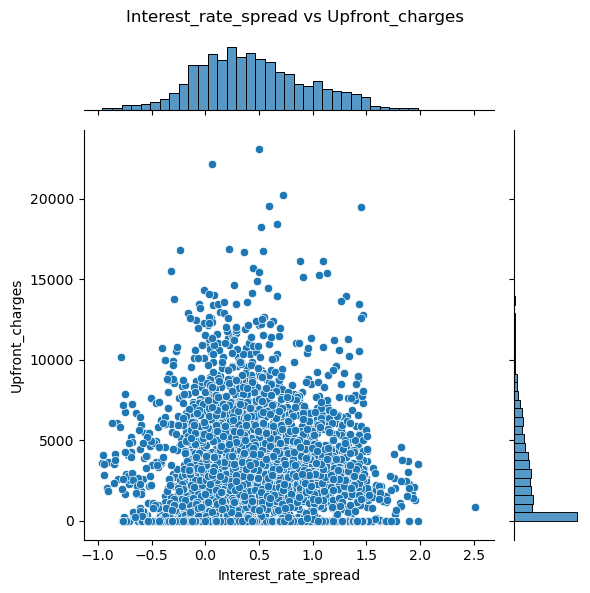

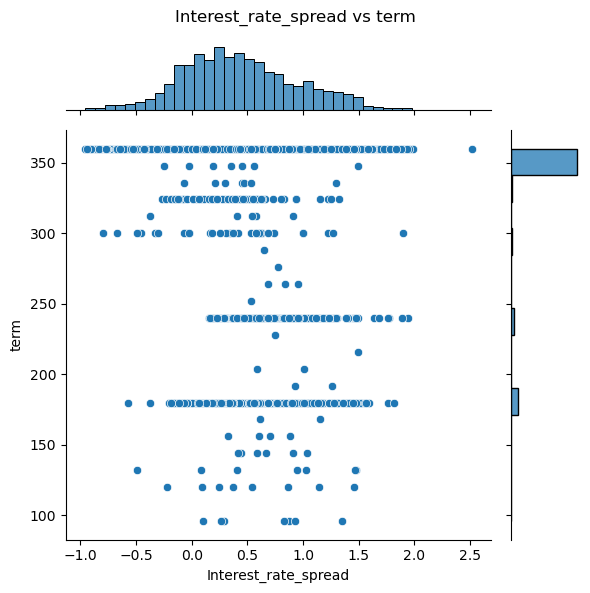

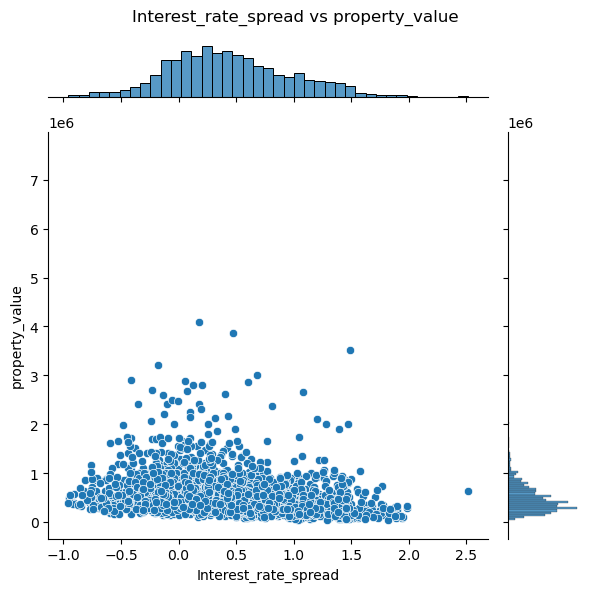

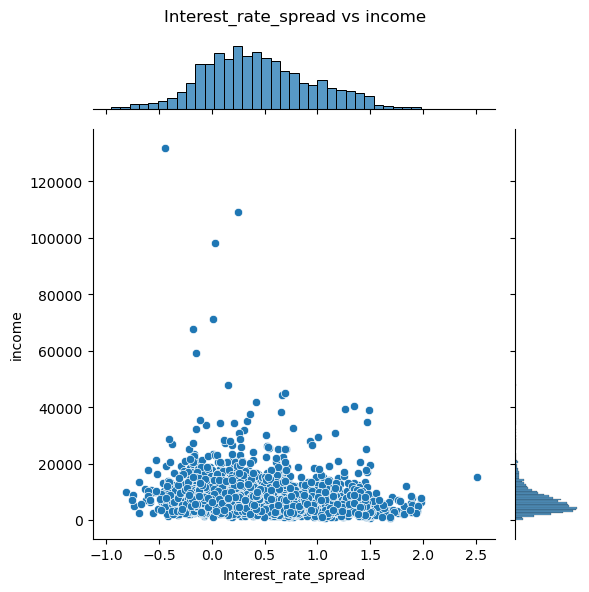

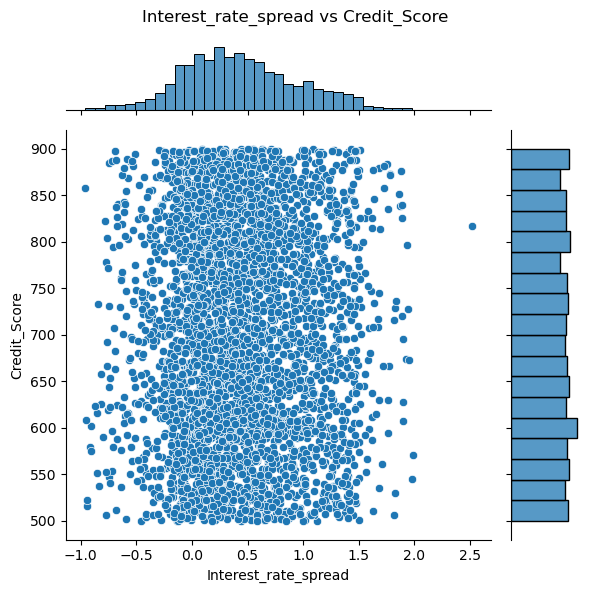

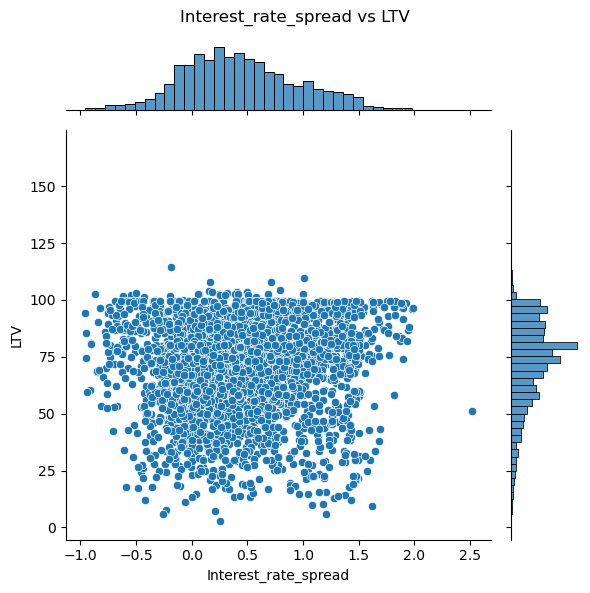

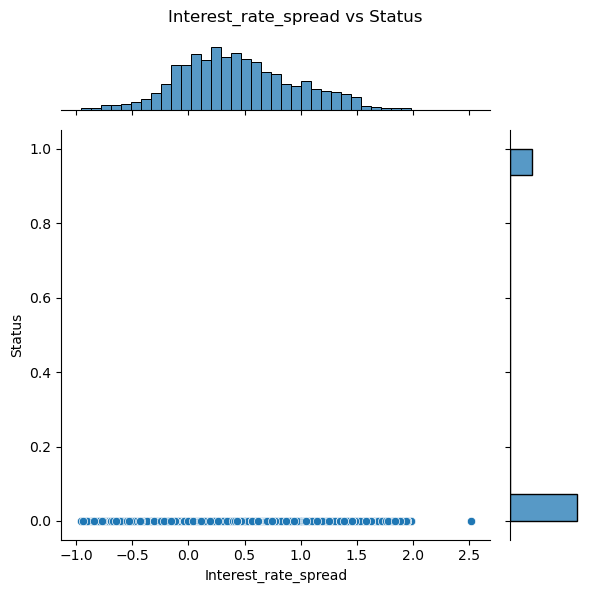

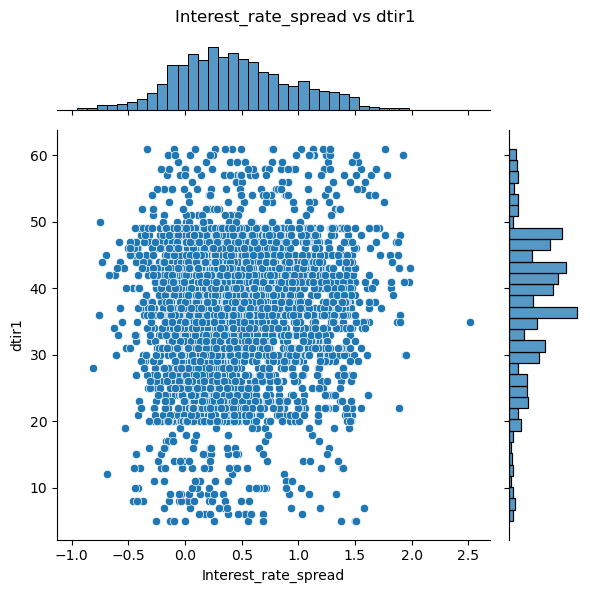

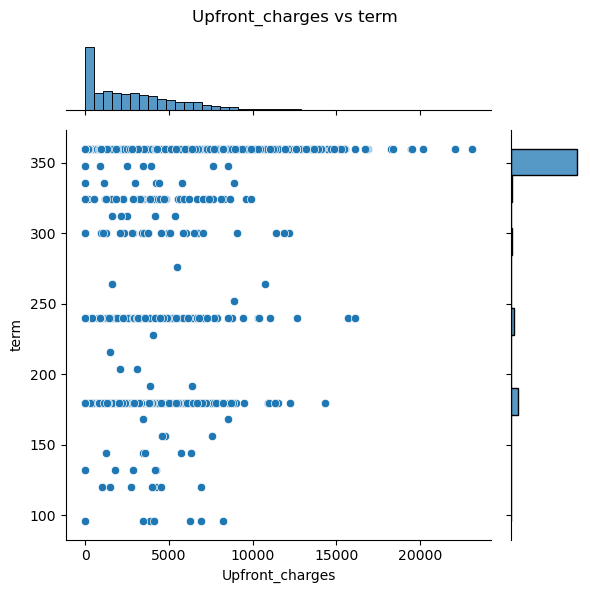

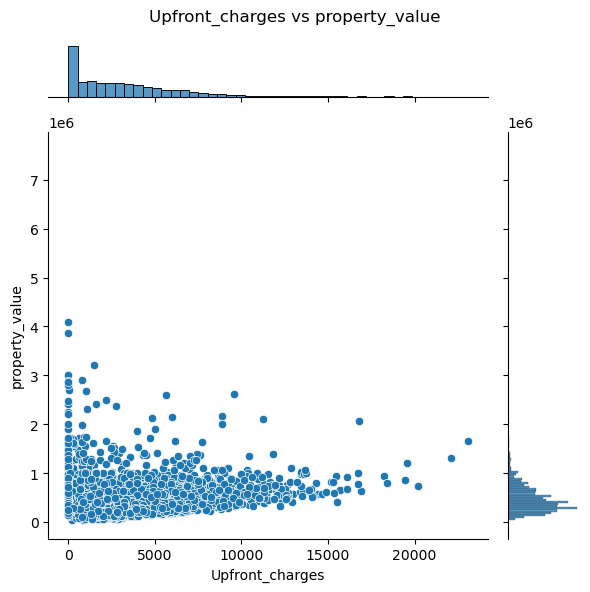

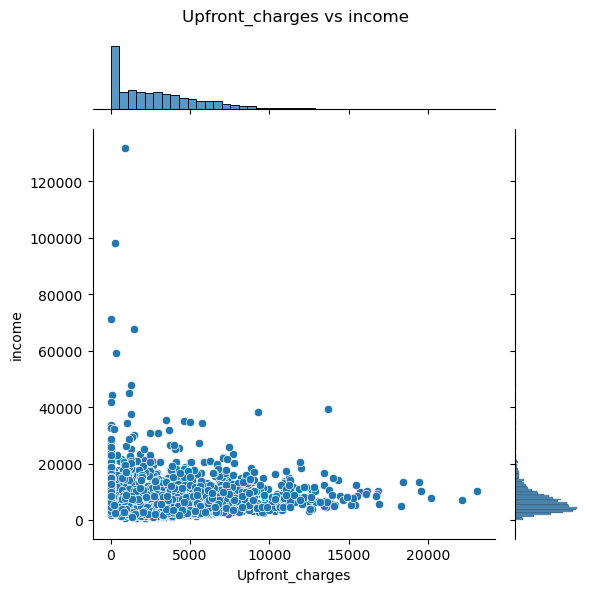

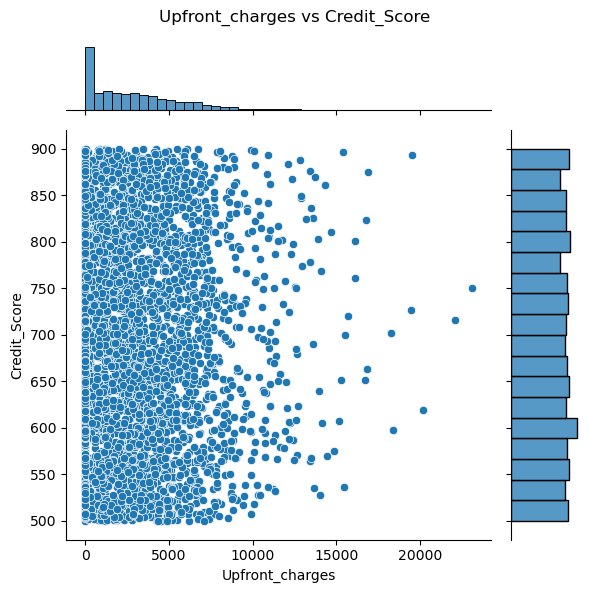

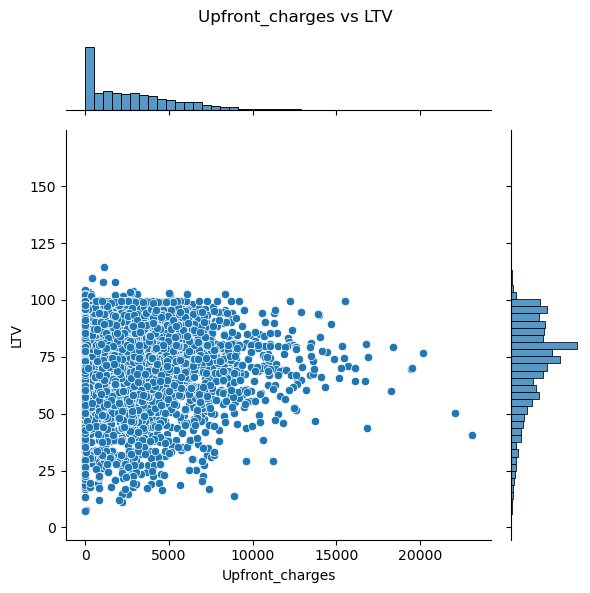

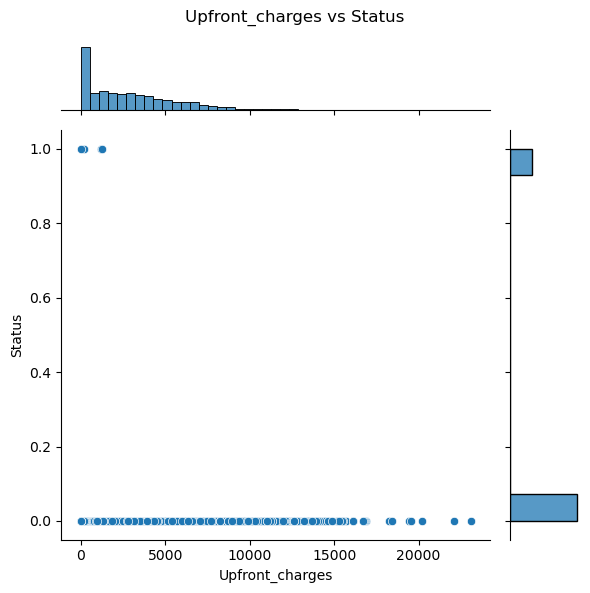

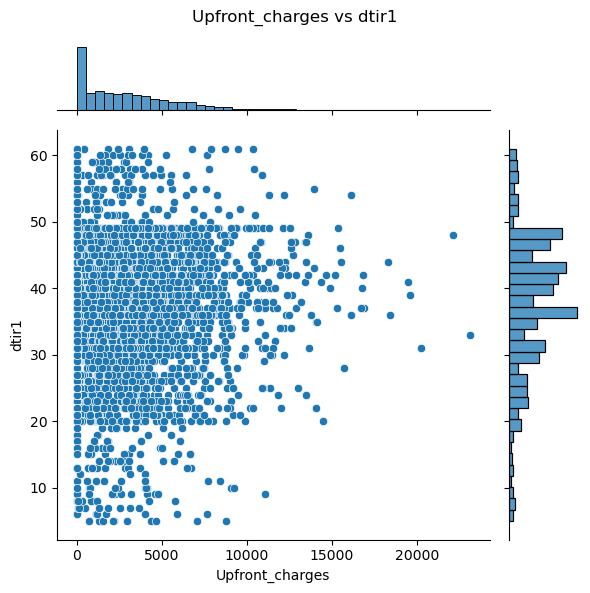

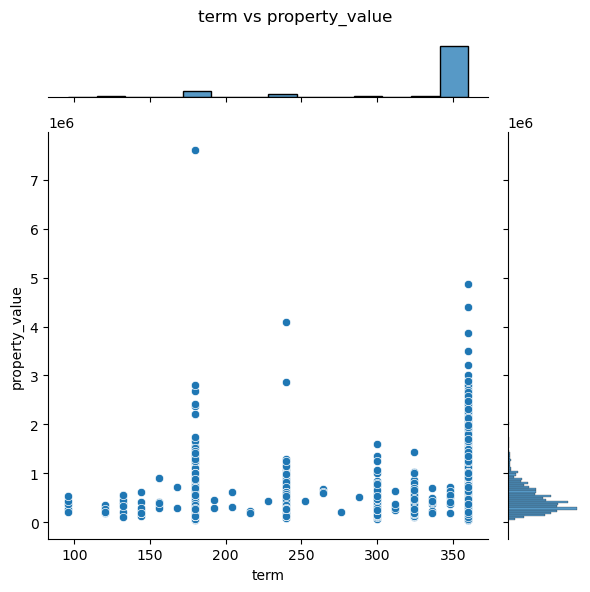

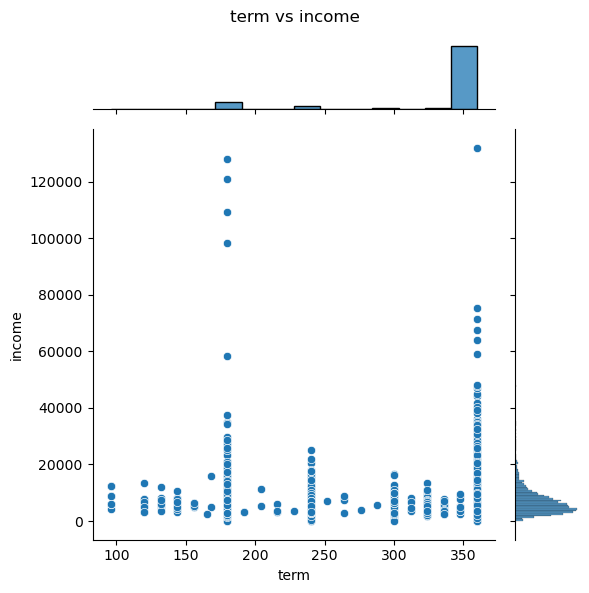

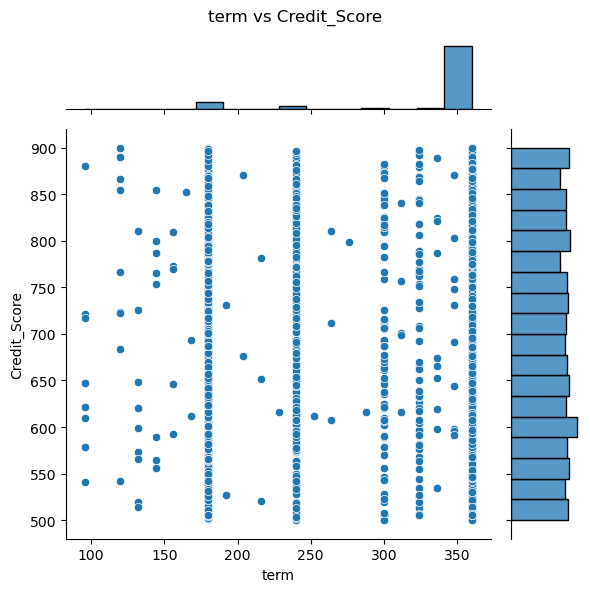

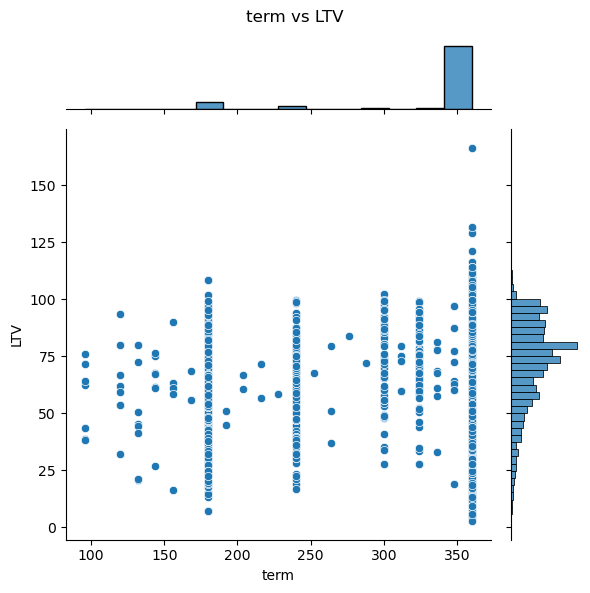

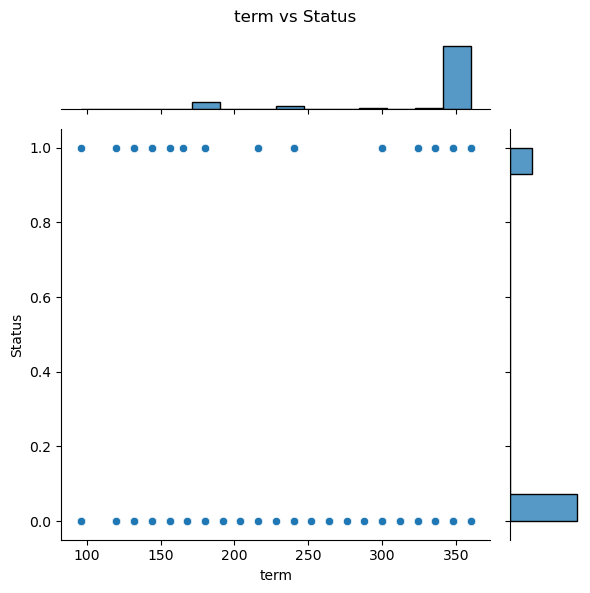

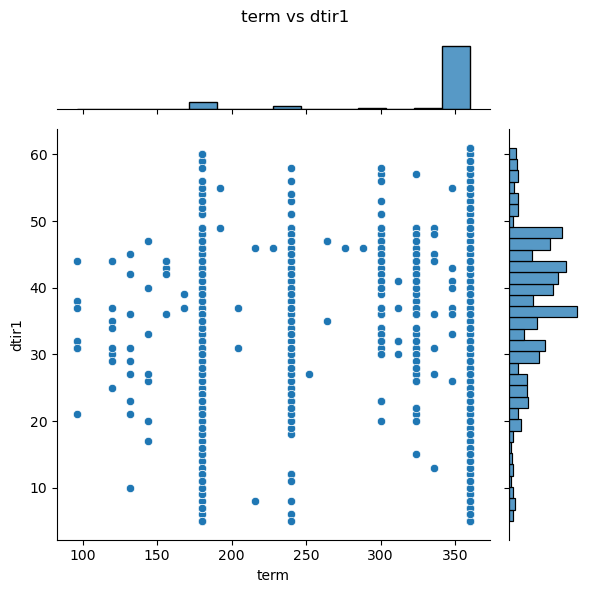

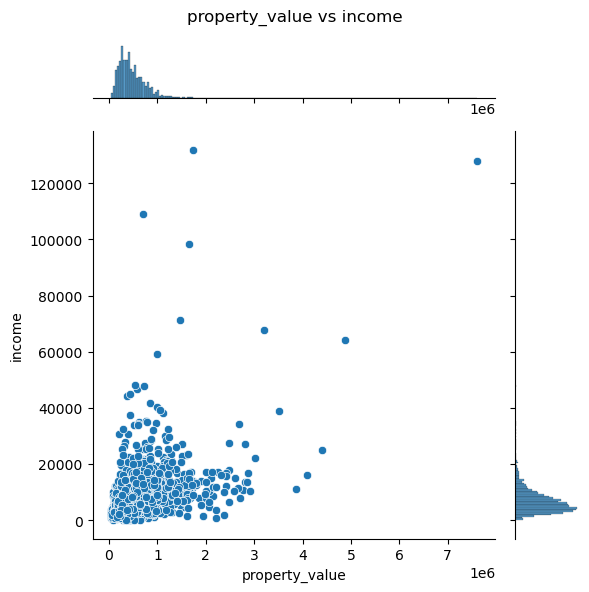

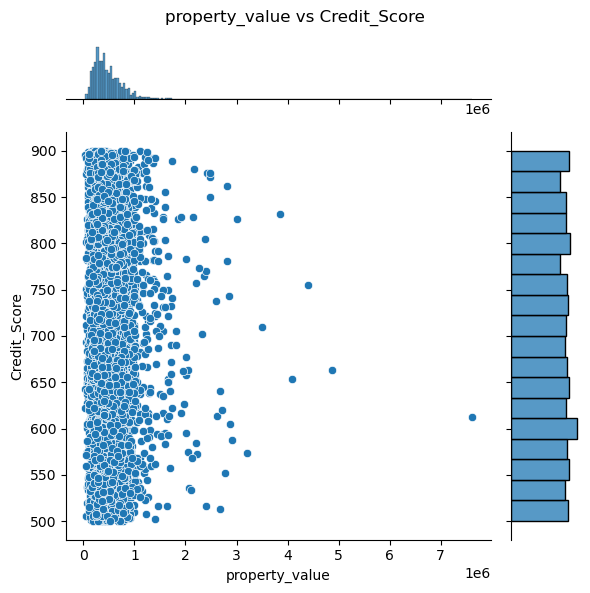

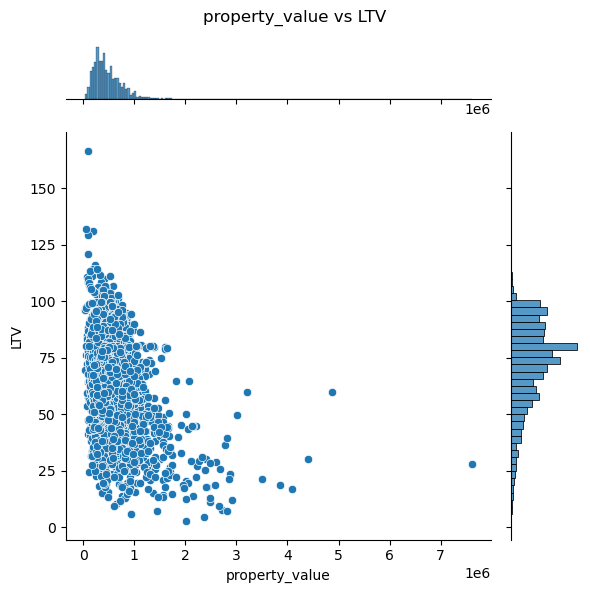

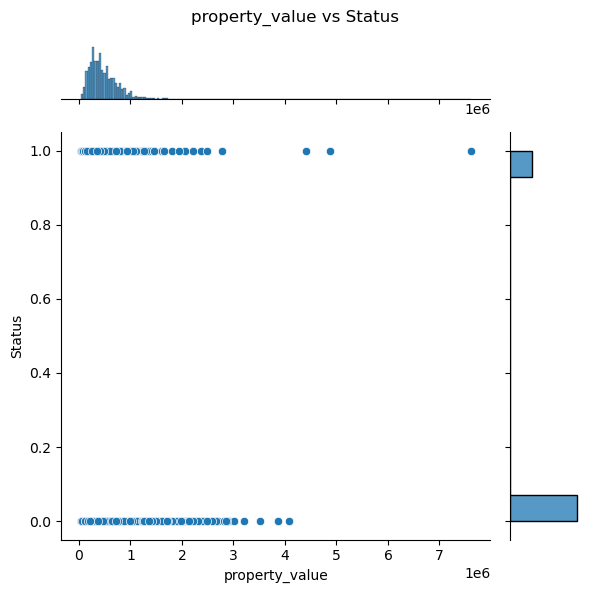

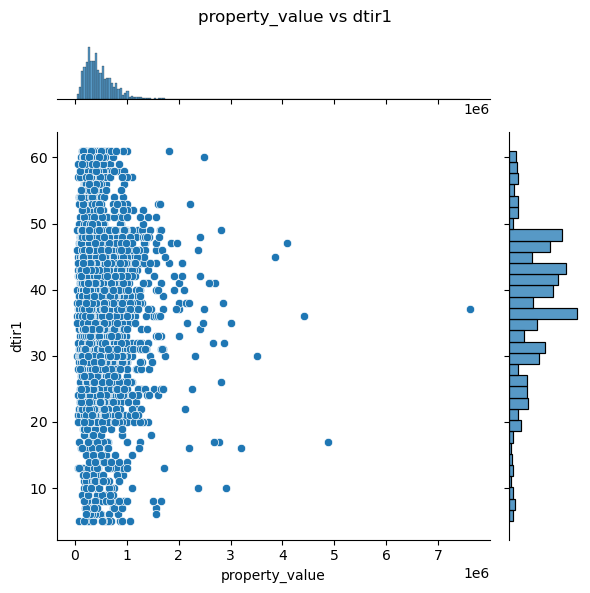

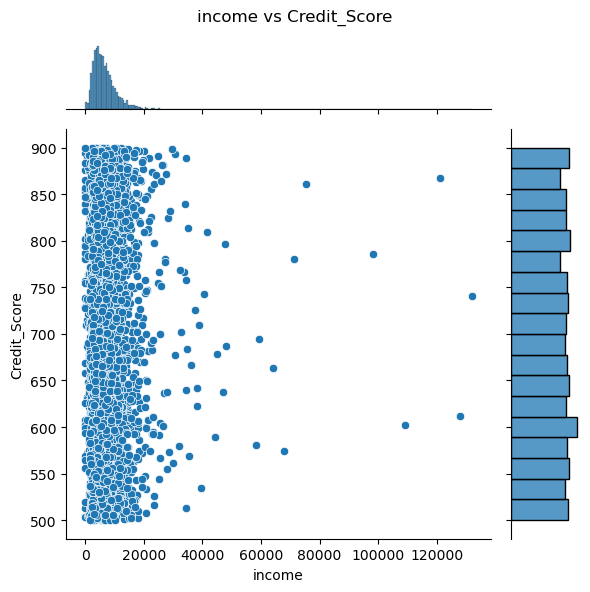

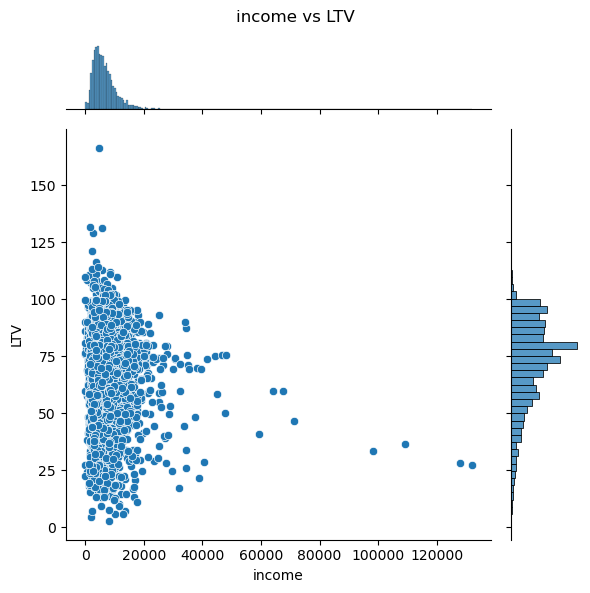

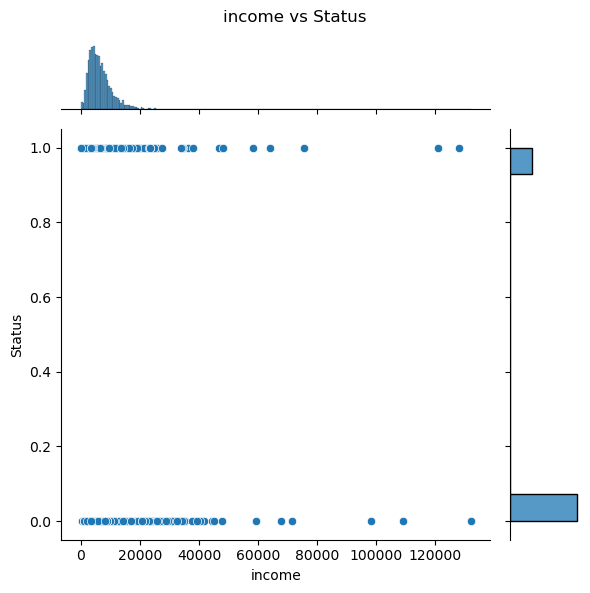

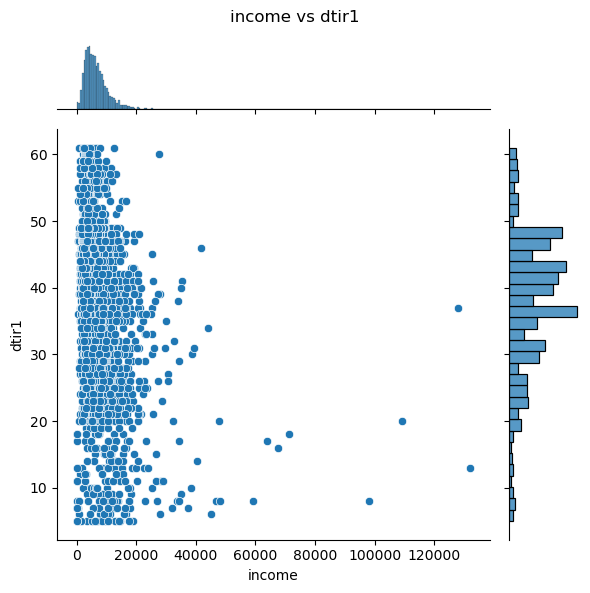

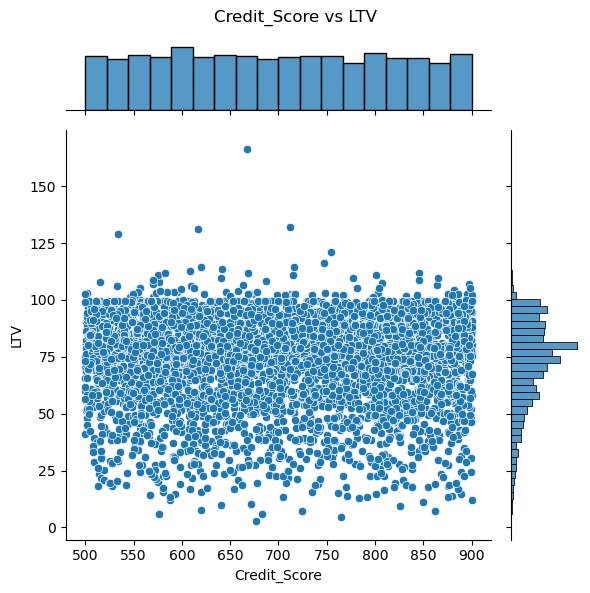

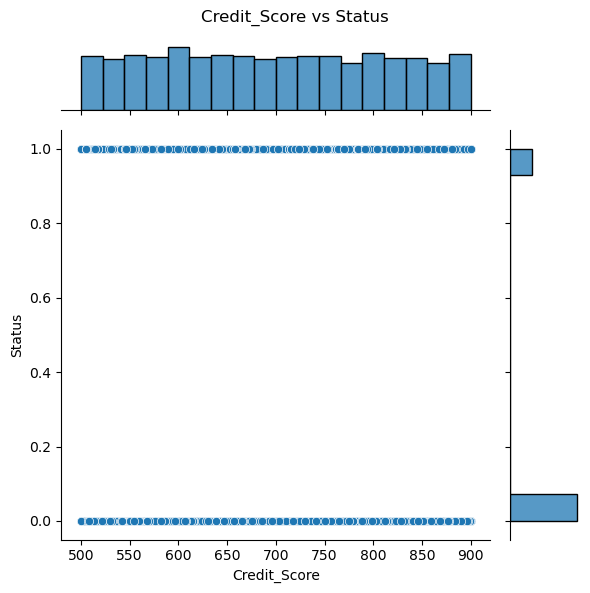

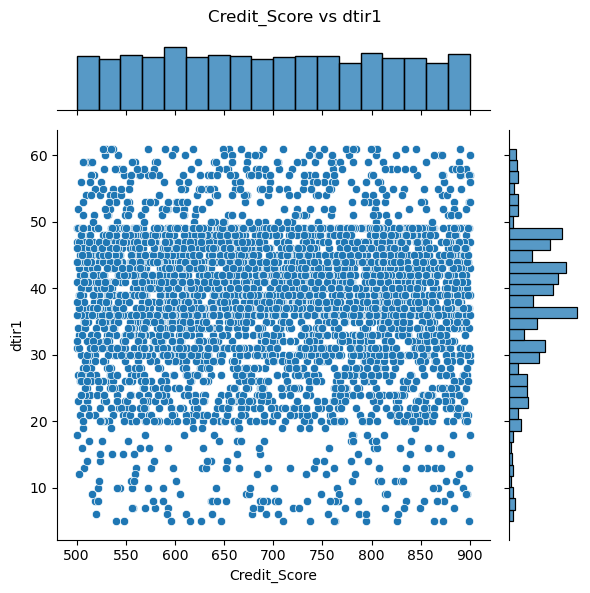

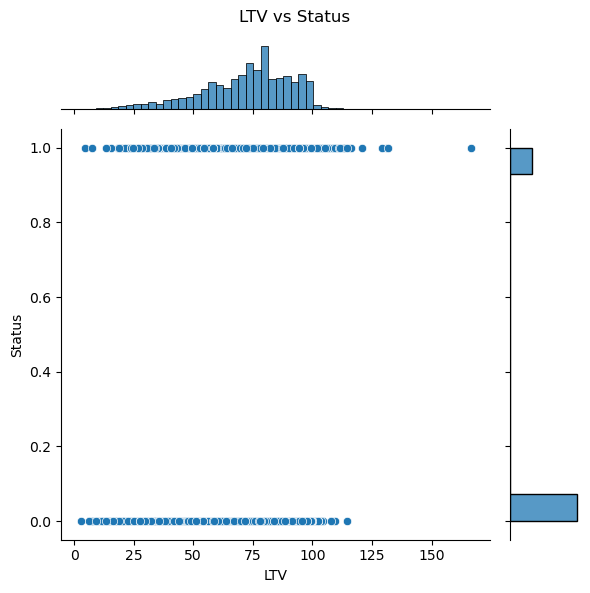

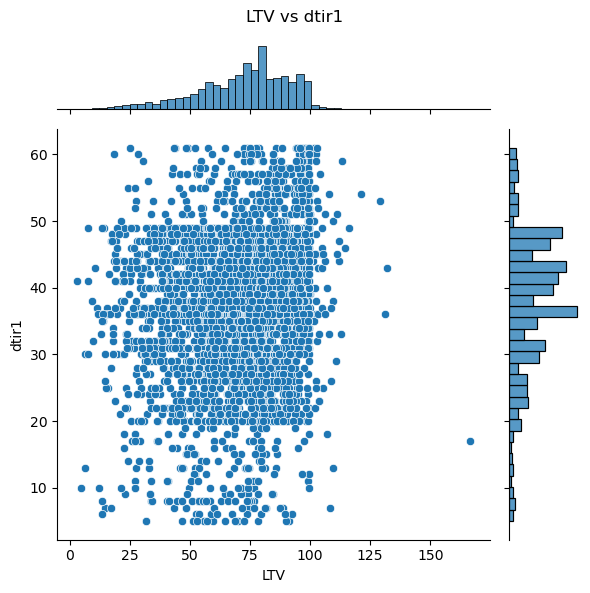

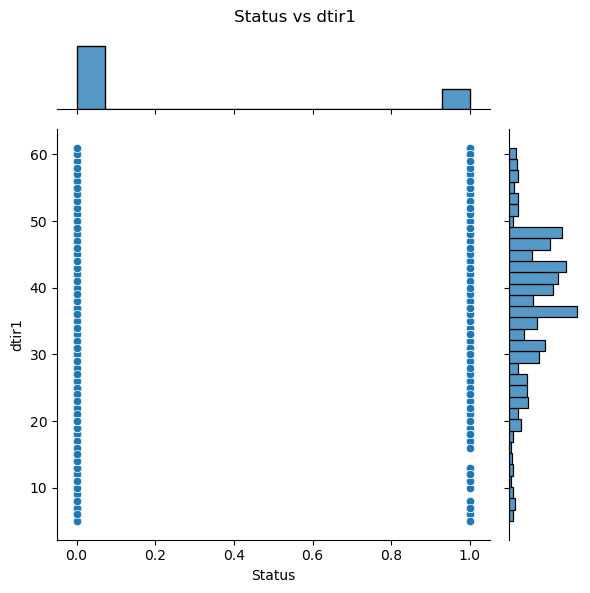

In [21]:
from itertools import combinations

# Limit number of rows for plotting if large dataset
sample_df = df[numeric_cols].sample(n=5000, random_state=42)

# Plot jointplots for all combinations of numeric features (or select your own)
for col_x, col_y in combinations(numeric_cols, 2):
    sns.jointplot(data=sample_df, x=col_x, y=col_y, kind='scatter', height=6)
    plt.suptitle(f'{col_x} vs {col_y}', fontsize=12)
    plt.tight_layout()
    plt.show()

## 4. Data Pre-Processing
### Handling Outliers: Capping & Flooring
Based on our describe() and histogram analysis, some features have extreme high-end outliers. We'll handle these using capping. We'll calculate the 99th percentile for these features and set any value above it to a new value (e.g., 3 times the 99th percentile) to reduce the effect of these extreme values.

In [22]:
#Apply capping and flooring
#Calculate 99th percentile, handling missing values
ul = np.nanpercentile(df['income'], 99)
print("99th percentile of income:", ul)

#Identify outliers
mask = df['income'] > ul
print(mask)

#Show actual outlier values
print("Outlier values:\n", df['income'][mask])

#Cap those outliers
df.loc[df.income > ul, 'income'] = 3 * ul

#To confirm
print("Max value of income after capping:", df['income'].max())


99th percentile of income: 26640.0
0         False
1         False
2         False
3         False
4         False
          ...  
148665    False
148666    False
148667    False
148668    False
148669    False
Name: income, Length: 148670, dtype: bool
Outlier values:
 137       54300.0
185       78120.0
295       27000.0
343       71220.0
392       30180.0
           ...   
147545    41820.0
147755    49500.0
147921    28440.0
148274    79920.0
148498    51000.0
Name: income, Length: 1394, dtype: float64
Max value of income after capping: 79920.0


In [23]:
outlier_cols = ['property_value', 'loan_amount', 'Upfront_charges', 'LTV']
import numpy as np

for col in outlier_cols:
    ul = np.nanpercentile(df[col], 99)
    df.loc[df[col] > ul, col] = 3 * ul

In [24]:
for col in outlier_cols:
    ul = np.nanpercentile(df[col], 99)
    capped_value = 3 * ul
    
    # Check if any value still exceeds the capped value
    if (df[col] <= capped_value).any():
        print(f"{col} capped correctly. Max = {df[col].max()}")


property_value capped correctly. Max = 5424000.0
loan_amount capped correctly. Max = 2569500
Upfront_charges capped correctly. Max = 42891.14969999989
LTV capped correctly. Max = 308.27922090000004


### Handling Outliers: Flooring
Similarly, we'll check for extremely low values using the 1st percentile. We'll then apply flooring to a set of features, setting any value below a certain threshold (e.g., 0.3 times the 1st percentile) to that threshold. This prevents unrealistically low or zero values from skewing the model.

In [25]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    # Skip ID and year if still present
    if col.lower() in ['id', 'year']:
        continue
    # Calculate 1st percentile ignoring NaNs
    p1 = np.nanpercentile(df[col], 1)

    # Count how many values are below this percentile
    count_below = (df[col] < p1).sum()

    print(f"{col}: {count_below} values below 1st percentile ({p1:.2f})")

loan_amount: 1171 values below 1st percentile (66500.00)
rate_of_interest: 780 values below 1st percentile (2.88)
Interest_rate_spread: 1120 values below 1st percentile (-0.68)
Upfront_charges: 0 values below 1st percentile (0.00)
term: 1350 values below 1st percentile (180.00)
property_value: 921 values below 1st percentile (88000.00)
income: 1376 values below 1st percentile (600.00)
Credit_Score: 1443 values below 1st percentile (504.00)
LTV: 1335 values below 1st percentile (19.61)
Status: 0 values below 1st percentile (0.00)
dtir1: 1185 values below 1st percentile (8.00)


In [26]:
#Let's start flooring
floor_cols = ['loan_amount', 'property_value', 'income', 'Credit_Score', 'LTV']

for col in floor_cols:
    ll = np.nanpercentile(df[col], 1)
    threshold = 0.3 * ll
    df.loc[df[col] < threshold, col] = threshold
    
for col in floor_cols:
    ll = np.nanpercentile(df[col], 1)
    floor_value = 0.3 * ll

    # Check if any value is still below the flooring threshold
    below_floor = (df[col] < floor_value).sum()
    if below_floor <= 0:
        print(f"{col} floored successfully. No values below {floor_value:.2f}")

loan_amount floored successfully. No values below 19950.00
property_value floored successfully. No values below 26400.00
income floored successfully. No values below 180.00
Credit_Score floored successfully. No values below 151.20
LTV floored successfully. No values below 5.88


C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\3495688641.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '151.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < threshold, col] = threshold


### Visualizing Categorical Features
Now let's look at our categorical features. We'll use countplot for each one to see the frequency of each category. This helps us understand the distribution and identify any very rare categories.

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


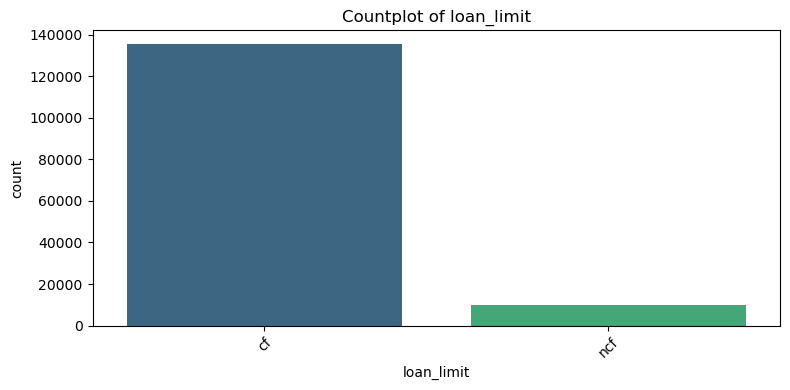

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


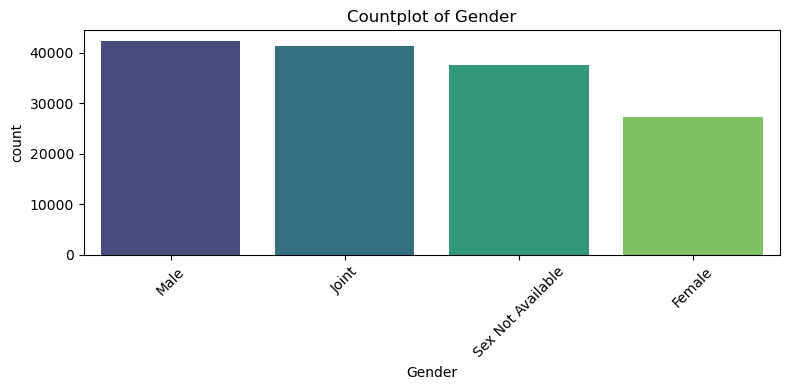

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


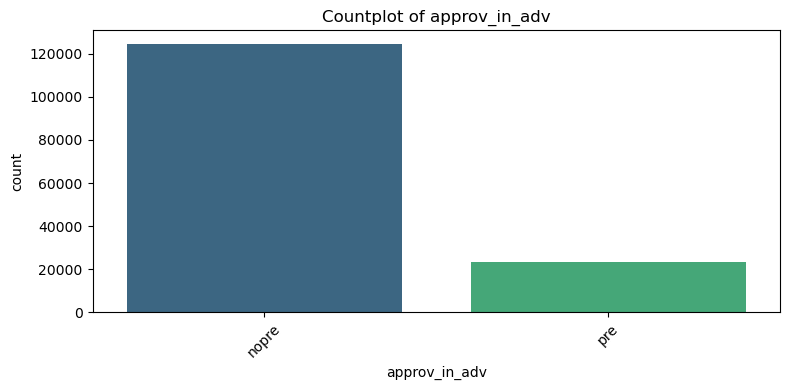

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


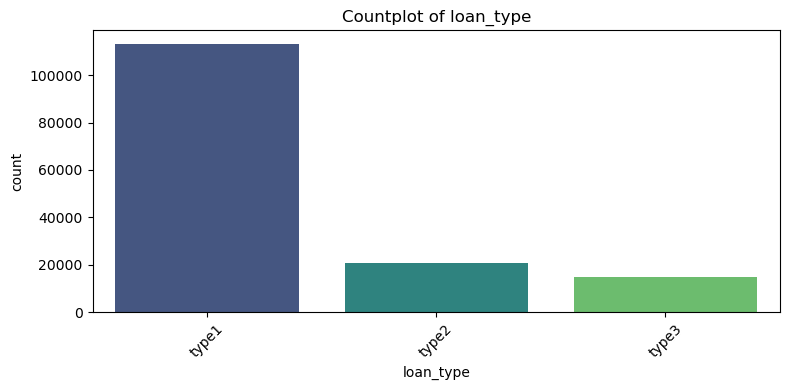

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


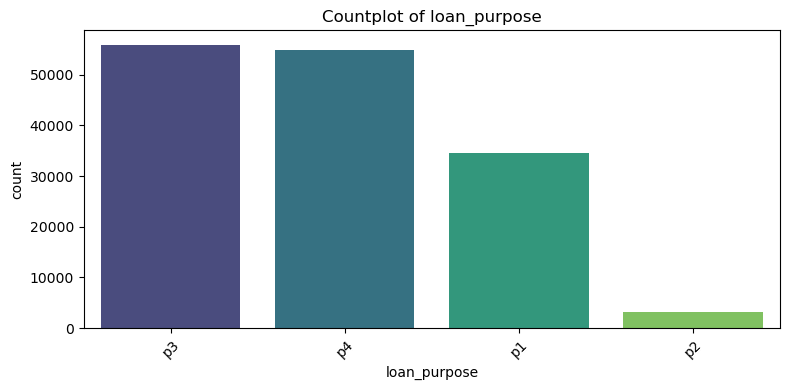

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


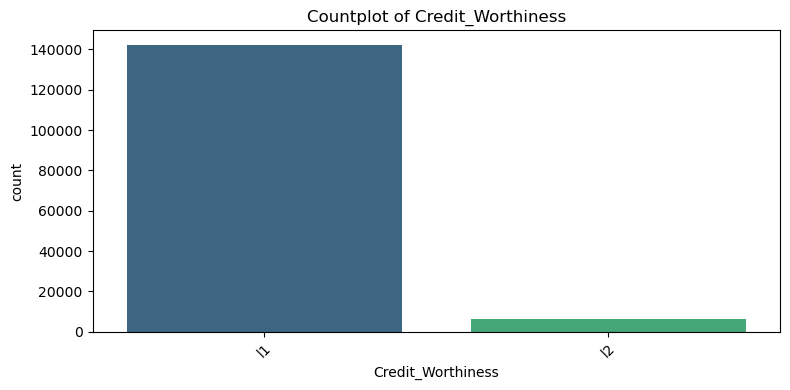

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


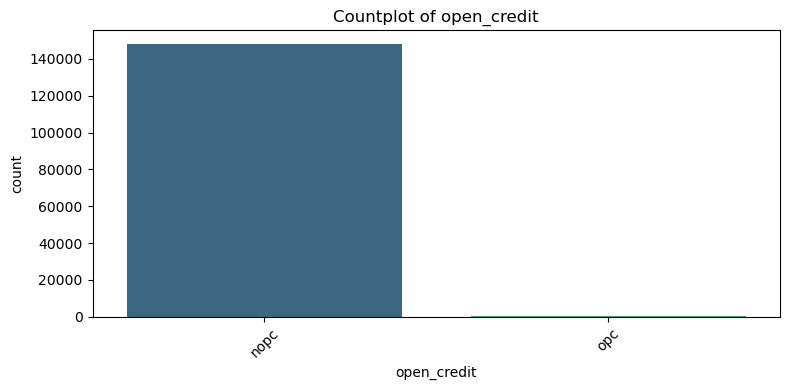

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


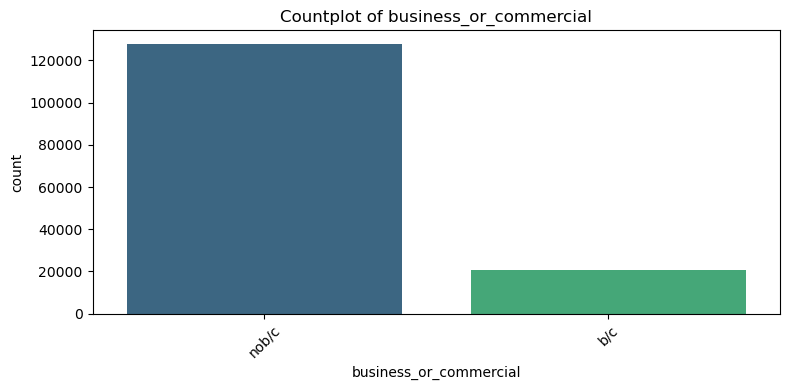

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


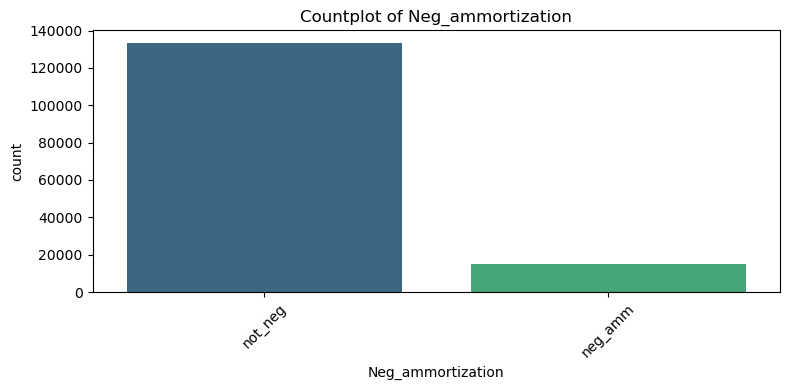

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


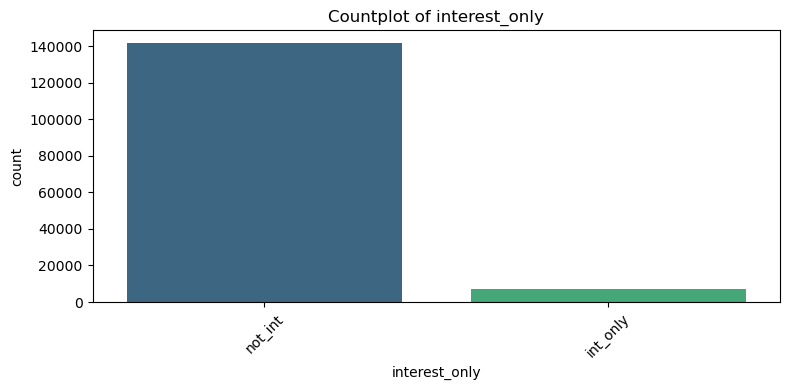

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


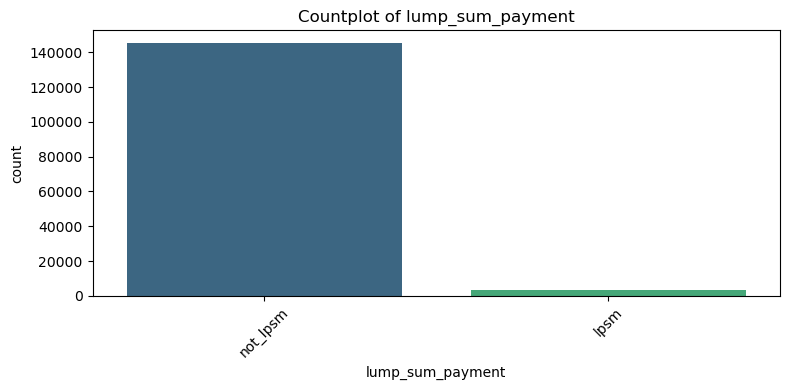

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


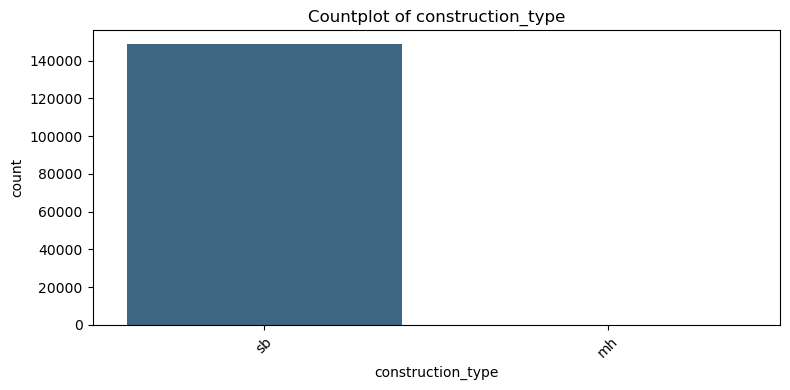

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


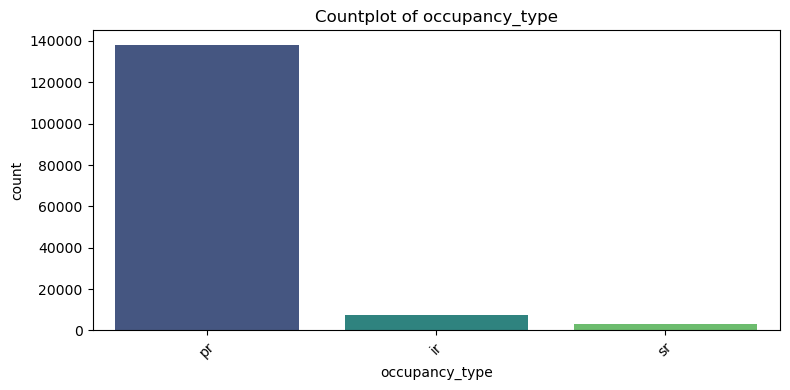

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


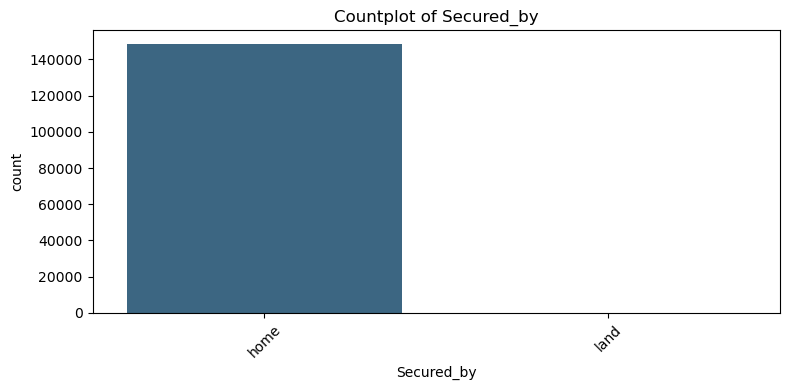

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


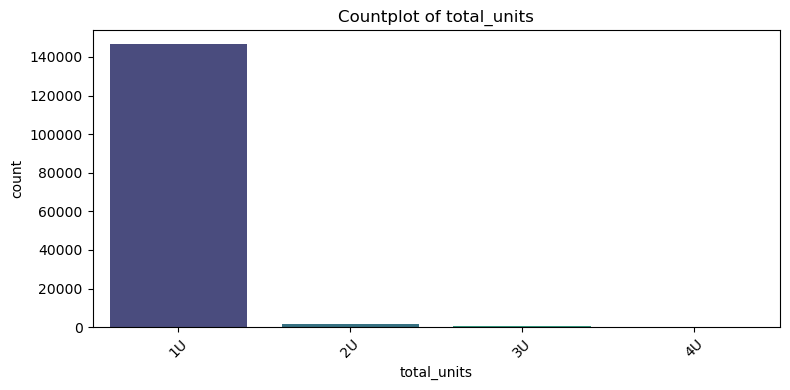

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


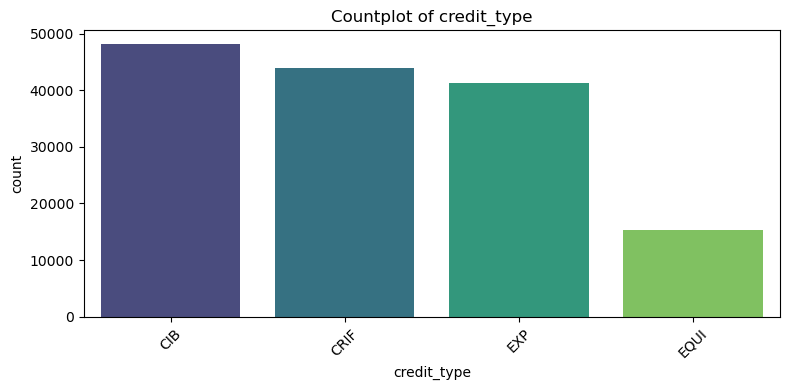

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


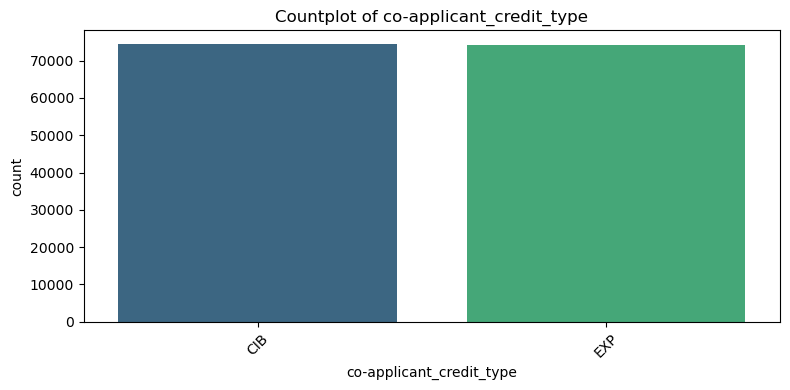

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


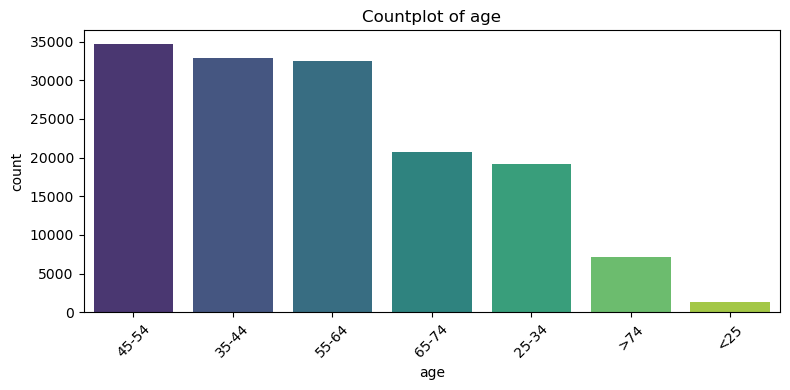

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


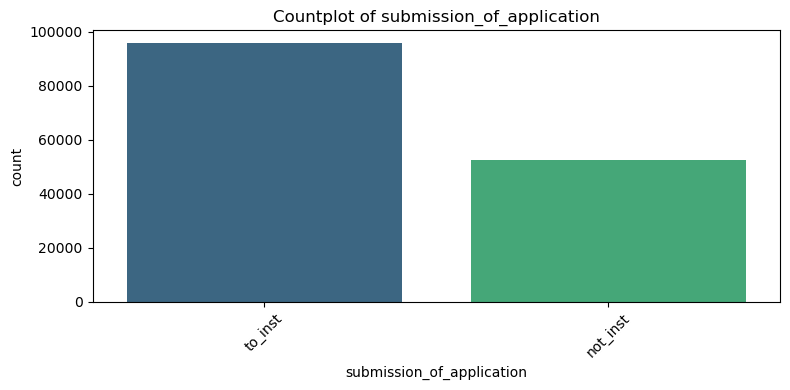

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


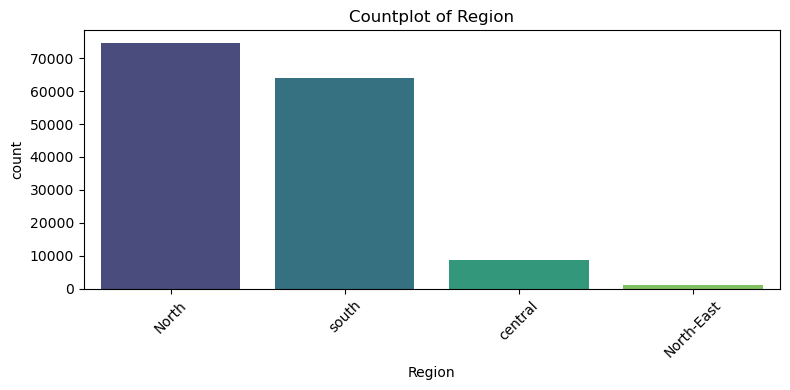

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


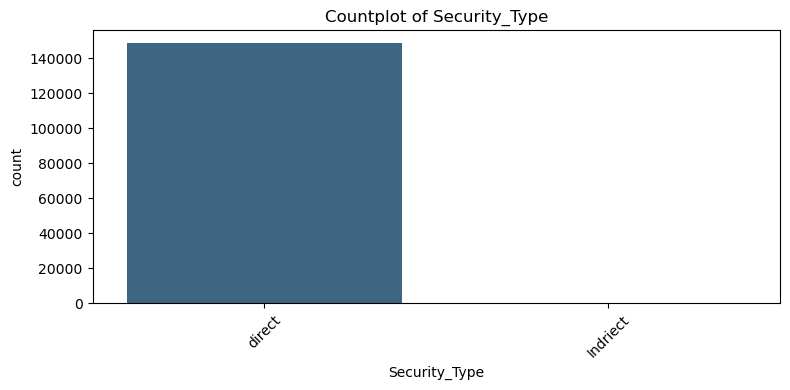

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


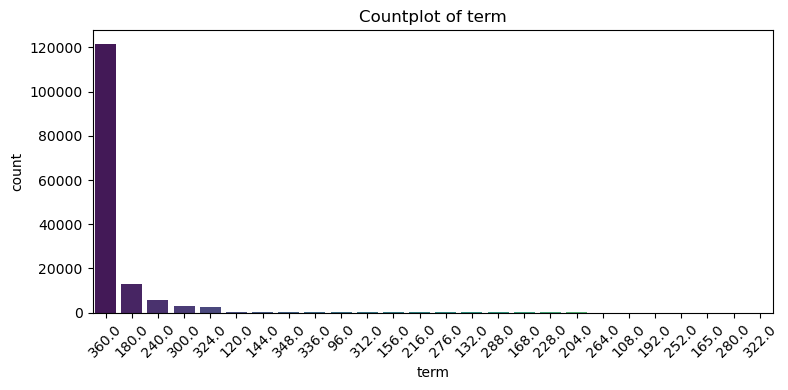

C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\1541166148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


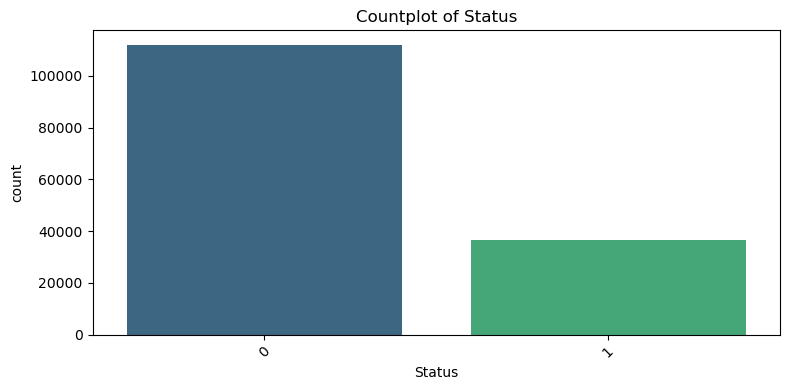

In [27]:
categorical_cols = list(df.select_dtypes(include='object').columns) + ['term', 'Status']
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Handling Missing Values: Imputation
We'll check our missing value counts again. For skewed numerical columns, we'll use median imputation. For categorical columns, we'll use mode imputation (filling with the most frequent value).

In [28]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [29]:
# Update lists after identifying data types properly
num_median_impute = [
    'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
    'property_value', 'income', 'LTV', 'dtir1'
]

cat_mode_impute = [
    'loan_limit', 'approv_in_adv', 'loan_purpose',
    'Neg_ammortization', 'submission_of_application', 'age'  # age moved here
]

# Median imputation for skewed numeric columns
for col in num_median_impute:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Mode imputation for categorical columns
for col in cat_mode_impute:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Check if any missing values remain in those columns
print(df[num_median_impute + cat_mode_impute].isnull().sum())


rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
property_value               0
income                       0
LTV                          0
dtir1                        0
loan_limit                   0
approv_in_adv                0
loan_purpose                 0
Neg_ammortization            0
submission_of_application    0
age                          0
dtype: int64


### Final Outlier Check
After imputation and outlier handling, we'll generate a boxplot of all our numerical features to get a final visual confirmation that the extreme outliers have been managed.

<Axes: >

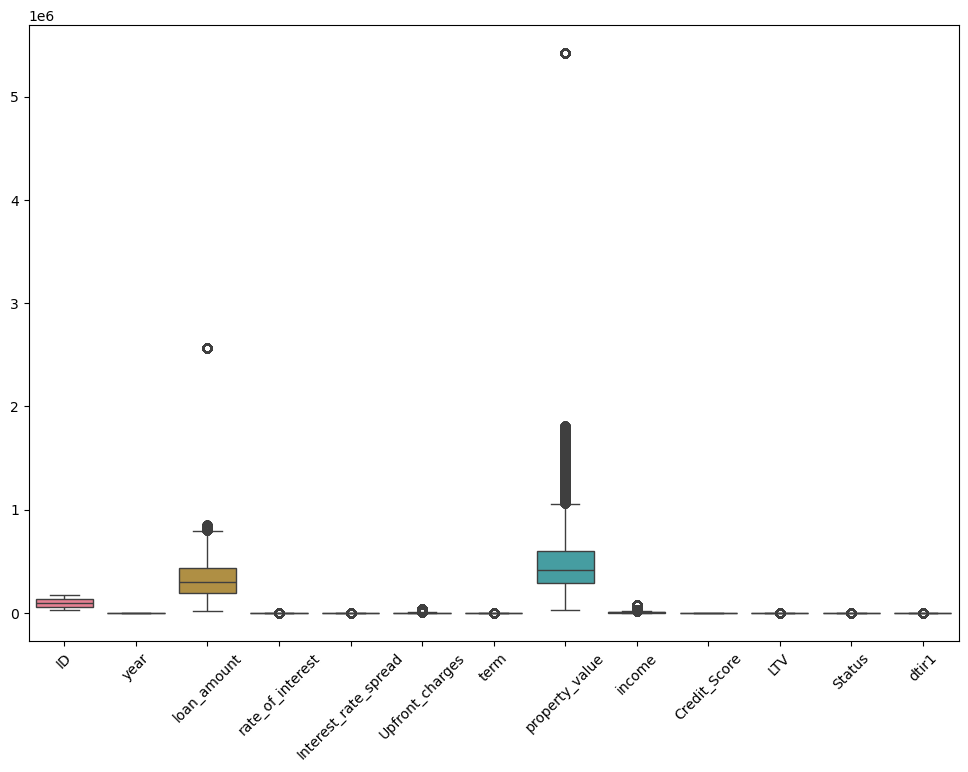

In [30]:
#To check for outliers
plt.figure(figsize = (12, 8))
plt.xticks(rotation=45)
sns.boxplot(data = df)
#The dots above and below the upper and lower whisker represent the outliers

In [31]:
for col in outlier_cols:
    ul = np.nanpercentile(df[col], 99)
    capped_value = 3 * ul
    
    # Check if any value still exceeds the capped value
    if (df[col] <= capped_value).any():
        print(f"{col} capped correctly. Max = {df[col].max()}")


property_value capped correctly. Max = 5424000.0
loan_amount capped correctly. Max = 2569500
Upfront_charges capped correctly. Max = 42891.14969999989
LTV capped correctly. Max = 308.27922090000004


## 5. Data Transformation
Correcting Skewness with Log and Sqrt Transforms
Our earlier analysis showed that several features are highly skewed. To help our models (especially linear ones), we will apply transformations. We'll use a square root transformation (np.sqrt) for Upfront_charges and a log transformation (np.log1p, which handles zero values) for income, LTV, property_value, and loan_amount. We'll then check the skewness again to confirm the improvement.

In [32]:
df_transformed = df.copy()

In [33]:
# Apply log1p and sqrt transformation for Upfront_charges_sqrt and Upfront_charges based on the jointplot made earlier
df['Upfront_charges_sqrt'] = np.sqrt(df['Upfront_charges'])
df['income_log'] = np.log1p(df['income'])

print("Skewness after log1p transformation:")
print(f"Upfront_charges_log: {df['Upfront_charges_sqrt'].skew():.4f}")
print(f"income_log: {df['income_log'].skew():.4f}")

# List of columns to apply log1p transformation
columns_to_transform = ['LTV', 'property_value', 'loan_amount']

print("Applying log1p transformation to:", columns_to_transform)

# Apply log1p transformation and store in new columns
for col in columns_to_transform:
    if col in df.columns:
        new_col_name = f"{col}_log"
        df[new_col_name] = np.log1p(df[col])
        print(f"Transformed '{col}' to '{new_col_name}'.")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping transformation.")

print("\nSkewness after log1p transformation:")
for col in columns_to_transform:
    new_col_name = f"{col}_log"
    if new_col_name in df.columns:
        skew_value = df[new_col_name].skew()
        print(f"{new_col_name}: {skew_value:.4f}")
    else:
        print(f"Warning: Transformed column '{new_col_name}' not found. Cannot calculate skewness.")

# Display the head of the DataFrame to show the new columns
print("\nDataFrame head with new log-transformed columns:")
print(df.head())

Skewness after log1p transformation:
Upfront_charges_log: 0.8593
income_log: -0.6127
Applying log1p transformation to: ['LTV', 'property_value', 'loan_amount']
Transformed 'LTV' to 'LTV_log'.
Transformed 'property_value' to 'property_value_log'.
Transformed 'loan_amount' to 'loan_amount_log'.

Skewness after log1p transformation:
LTV_log: -1.1066
property_value_log: 0.3357
loan_amount_log: -0.0235

DataFrame head with new log-transformed columns:
      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        

### Visualizing Transformed Features
Let's quickly visualize our newly transformed variables with boxplots and jointplots to ensure their distributions are more normalized and the relationships are clearer.

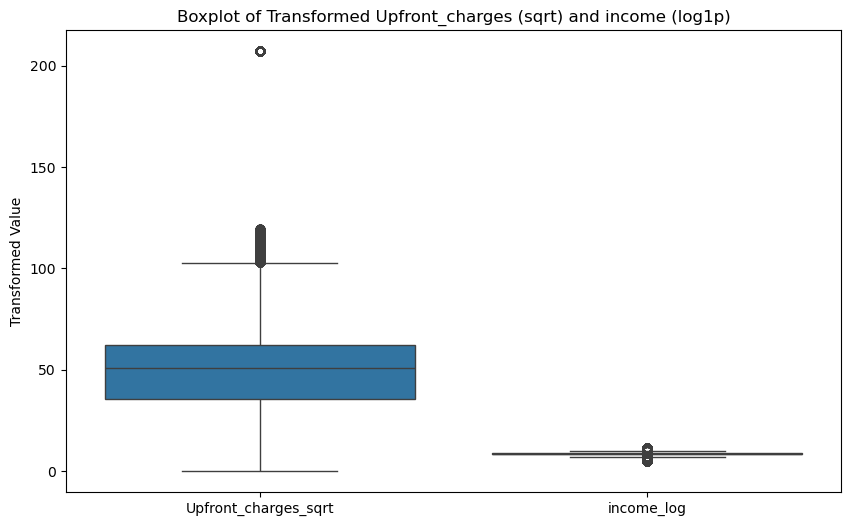

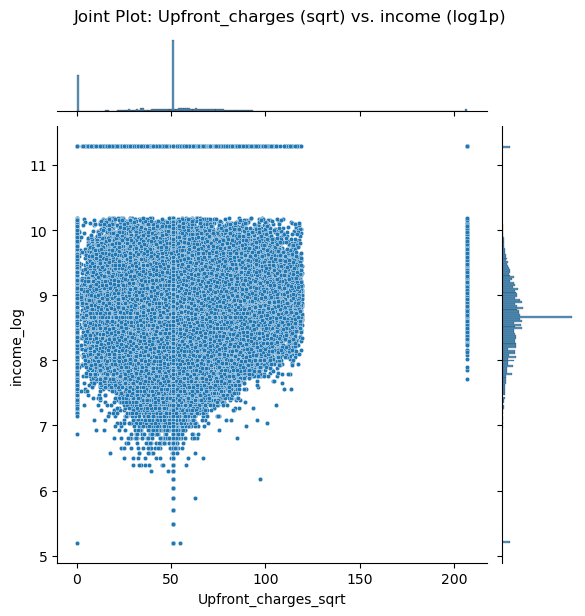

In [34]:
# 1. Boxplot of Transformed Variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Upfront_charges_sqrt', 'income_log']])
plt.title('Boxplot of Transformed Upfront_charges (sqrt) and income (log1p)')
plt.ylabel('Transformed Value')
plt.show()

# 2. Joint Plot of Transformed Variables
sns.jointplot(data=df, x='Upfront_charges_sqrt', y='income_log', kind='scatter', height=6, s=10) # s=10 reduces point size
plt.suptitle('Joint Plot: Upfront_charges (sqrt) vs. income (log1p)', y=1.02) # Adjust suptitle position
plt.show()


### Dropping Irrelevant Columns
We'll drop columns that are not useful for prediction, such as ID (a unique identifier), year, and Gender. Gender is dropped since we don't want our model to create biases based on gender that can be incorrect in a real-life business scenario. We don't want our model to give a Default prediction for a particular gender.

In [35]:
columns_to_drop = ['year', 'ID', 'Gender']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')


In [36]:
df.head()

loan_limit approv_in_adv loan_type loan_purpose Credit_Worthiness  \
0         cf         nopre     type1           p1                l1   
1         cf         nopre     type2           p1                l1   
2         cf           pre     type1           p1                l1   
3         cf         nopre     type1           p4                l1   
4         cf           pre     type1           p1                l1   

  open_credit business_or_commercial  loan_amount  rate_of_interest  \
0        nopc                  nob/c       116500              3.99   
1        nopc                    b/c       206500              3.99   
2        nopc                  nob/c       406500              4.56   
3        nopc                  nob/c       456500              4.25   
4        nopc                  nob/c       696500              4.00   

   Interest_rate_spread  ...        LTV  Region Security_Type Status dtir1  \
0                0.3904  ...  98.728814   south        direct      1  45.0   
1                0.3904  ...  75.135870   North        direct      1  39.0   
2                0.2000  ...  80.019685   south        direct      0  46.0   
3                0.6810  ...  69.376900   North        direct      0  42.0   
4                0.3042  ...  91.886544   North        direct      0  39.0   

   Upfront_charges_sqrt income_log   LTV_log property_value_log  \
0             50.955373   7.462215  4.602455          11.678448   
1             50.955373   8.513386  4.332520          12.943239   
2             24.392622   9.157045  4.394692          13.138239   
3             50.955373   9.382696  4.253865          13.396962   
4              0.000000   9.253496  4.531379          13.538440   

  loan_amount_log  
0       11.665655  
1       12.238061  
2       12.915342  
3       13.031346  
4       13.453825  

[5 rows x 36 columns]

### Handling Categorical Variables: One-Hot Encoding
Our machine learning models can only work with numbers. We will convert all remaining categorical (object) columns into numerical format using one-hot encoding via pd.get_dummies(). We use drop_first=True to avoid multicollinearity (the dummy variable trap).

In [37]:
df.columns
# Get dummy variables for all categorical columns
df_dummies = pd.get_dummies(df, drop_first=True) # drop_first=True helps avoid multicollinearity from dummies

print("Shape of DataFrame before dummies:", df.shape)
print("Shape of DataFrame after getting dummies:", df_dummies.shape)
print(df_dummies.head())


Shape of DataFrame before dummies: (148670, 36)
Shape of DataFrame after getting dummies: (148670, 51)
   loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500              3.99                0.3904          2596.45   
1       206500              3.99                0.3904          2596.45   
2       406500              4.56                0.2000           595.00   
3       456500              4.25                0.6810          2596.45   
4       696500              4.00                0.3042             0.00   

    term  property_value   income  Credit_Score        LTV  Status  ...  \
0  360.0        118000.0   1740.0         758.0  98.728814       1  ...   
1  360.0        418000.0   4980.0         552.0  75.135870       1  ...   
2  360.0        508000.0   9480.0         834.0  80.019685       0  ...   
3  360.0        658000.0  11880.0         587.0  69.376900       0  ...   
4  360.0        758000.0  10440.0         602.0  91.886544       0  ...

In [38]:
age_dummy_cols = [col for col in df_dummies.columns if col.startswith('age_')]

print(f"\nActual 'age' dummy columns created: {len(age_dummy_cols)}")
print(age_dummy_cols)


Actual 'age' dummy columns created: 6
['age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'age_<25', 'age_>74']


In [39]:
df = df_dummies

In [40]:
df.head()

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500              3.99                0.3904          2596.45   
1       206500              3.99                0.3904          2596.45   
2       406500              4.56                0.2000           595.00   
3       456500              4.25                0.6810          2596.45   
4       696500              4.00                0.3042             0.00   

    term  property_value   income  Credit_Score        LTV  Status  ...  \
0  360.0        118000.0   1740.0         758.0  98.728814       1  ...   
1  360.0        418000.0   4980.0         552.0  75.135870       1  ...   
2  360.0        508000.0   9480.0         834.0  80.019685       0  ...   
3  360.0        658000.0  11880.0         587.0  69.376900       0  ...   
4  360.0        758000.0  10440.0         602.0  91.886544       0  ...   

   age_45-54  age_55-64  age_65-74  age_<25  age_>74  \
0      False      False      False    False    False   
1      False       True      False    False    False   
2      False      False      False    False    False   
3       True      False      False    False    False   
4      False      False      False    False    False   

   submission_of_application_to_inst  Region_North-East  Region_central  \
0                               True              False           False   
1                               True              False           False   
2                               True              False           False   
3                              False              False           False   
4                              False              False           False   

   Region_south  Security_Type_direct  
0          True                  True  
1         False                  True  
2          True                  True  
3         False                  True  
4         False                  True  

[5 rows x 51 columns]

### Converting Boolean Dummies
The pd.get_dummies function might create boolean (True/False) columns. We'll explicitly convert these to integers (1/0) to ensure all data is numerical.

In [41]:
boolean_cols = df.select_dtypes(include='bool').columns
for col in boolean_cols:
    df[col] = df[col].astype(int)

print("Boolean columns converted to integers (1 and 0).")
print("\nDataFrame head after conversion:")
print(df.head())

Boolean columns converted to integers (1 and 0).

DataFrame head after conversion:
   loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500              3.99                0.3904          2596.45   
1       206500              3.99                0.3904          2596.45   
2       406500              4.56                0.2000           595.00   
3       456500              4.25                0.6810          2596.45   
4       696500              4.00                0.3042             0.00   

    term  property_value   income  Credit_Score        LTV  Status  ...  \
0  360.0        118000.0   1740.0         758.0  98.728814       1  ...   
1  360.0        418000.0   4980.0         552.0  75.135870       1  ...   
2  360.0        508000.0   9480.0         834.0  80.019685       0  ...   
3  360.0        658000.0  11880.0         587.0  69.376900       0  ...   
4  360.0        758000.0  10440.0         602.0  91.886544       0  ...   

   age_45-54  a

### Verifying Final Data Types
As a final check, we'll inspect the data types of our new dummy columns to ensure everything is ready for modeling.

In [42]:
# Adjust these column names based on your actual dummy column names
sample_cols_to_check = [col for col in df.columns if col.startswith(('age_', 'loan_limit_', 'approv_in_adv_', 'loan_purpose_', 'Neg_ammortization_', 'submission_of_application_', 'Region_', 'Security_Type_'))]

# If no specific dummy columns are known, just show first few dtypes
if not sample_cols_to_check:
    print(df.dtypes.head(10)) # Show first 10 dtypes
else:
    print(df[sample_cols_to_check].dtypes)

loan_limit_ncf                       int64
approv_in_adv_pre                    int64
loan_purpose_p2                      int64
loan_purpose_p3                      int64
loan_purpose_p4                      int64
Neg_ammortization_not_neg            int64
age_35-44                            int64
age_45-54                            int64
age_55-64                            int64
age_65-74                            int64
age_<25                              int64
age_>74                              int64
submission_of_application_to_inst    int64
Region_North-East                    int64
Region_central                       int64
Region_south                         int64
Security_Type_direct                 int64
dtype: object


### Correlation Analysis
Before modeling, we'll analyze the correlation matrix to understand the relationships between our features. We will:

->Visualize the entire matrix with a heatmap.

->We will find and list any pairs of features that are highly correlated (e.g., > 0.8), as this multicollinearity can destabilize some models that is give poor performance.

->Check the correlation of all features with our target variable, Status, to see which features are most predictive.

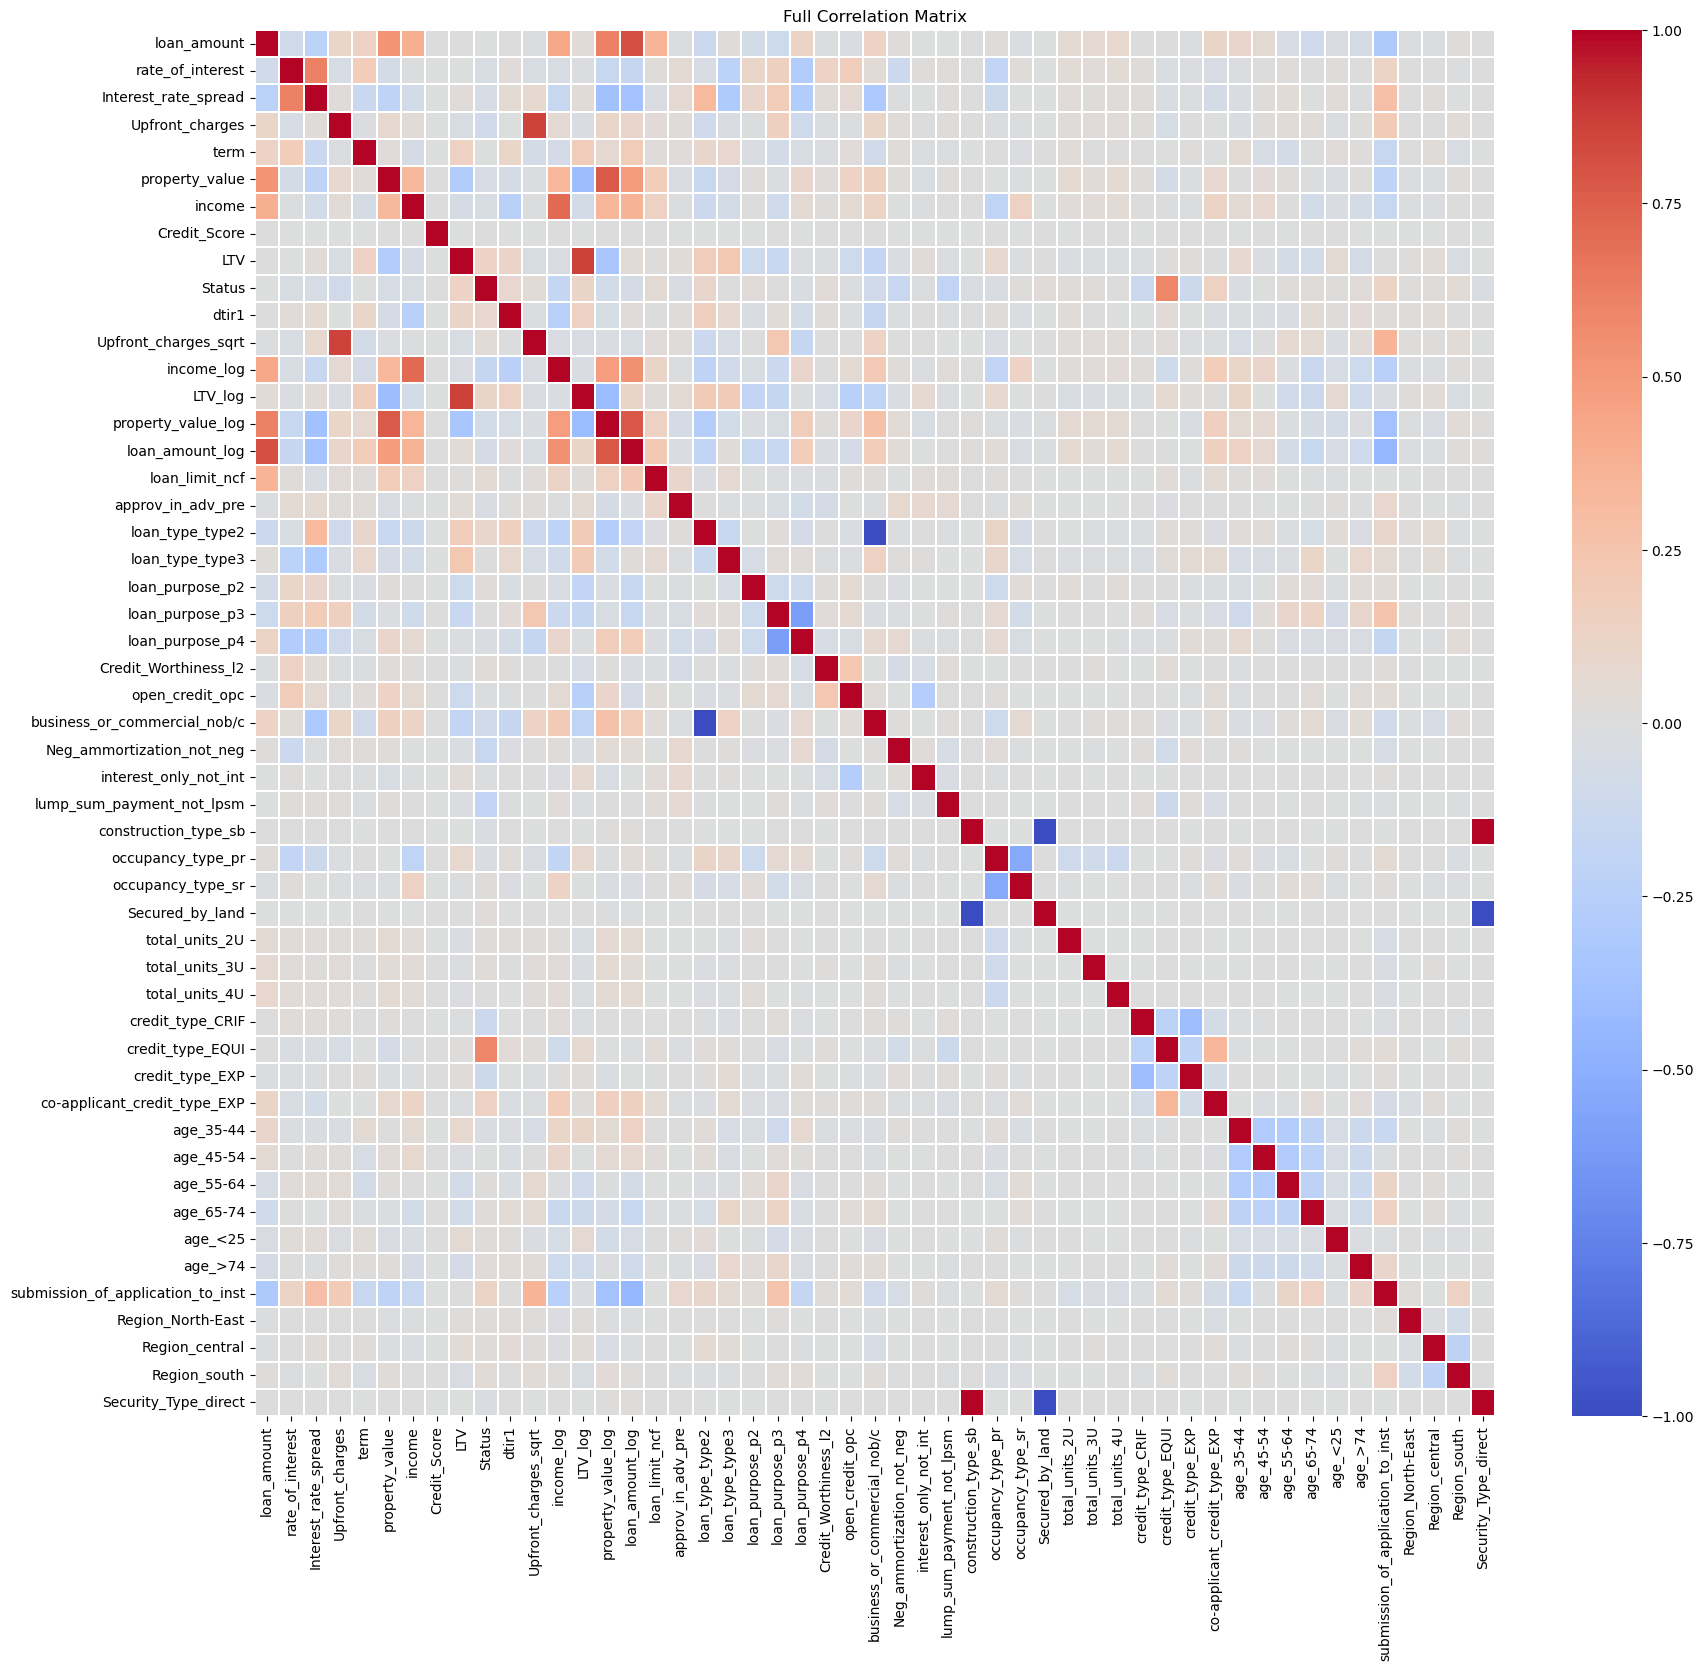


Highly Correlated Pairs (absolute correlation > 0.8):
  loan_amount <-> loan_amount_log: 0.8173
  Upfront_charges <-> Upfront_charges_sqrt: 0.8581
  LTV <-> LTV_log: 0.8665
  loan_type_type2 <-> business_or_commercial_nob/c: -1.0000
  construction_type_sb <-> Secured_by_land: -1.0000
  construction_type_sb <-> Security_Type_direct: 1.0000
  Secured_by_land <-> Security_Type_direct: -1.0000

Correlation with Target Variable 'Status':
Status                               1.000000
credit_type_EQUI                     0.592168
co-applicant_credit_type_EXP         0.144239
LTV                                  0.130001
submission_of_application_to_inst    0.122410
LTV_log                              0.115595
loan_type_type2                      0.092550
dtir1                                0.082432
loan_limit_ncf                       0.053332
Upfront_charges_sqrt                 0.041422
Region_south                         0.040051
Credit_Worthiness_l2                 0.034875
loan_purpo

In [43]:
# Calculate the correlation matrix
original_columns_to_drop = ['Upfront_charges','income','LTV','loan_amount','property_value']
corr_matrix = df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Full Correlation Matrix')
plt.show()

# Let's find pairs with absolute correlation > 0.8 (you can adjust this threshold)
#2.
highly_correlated_pairs = []
# Iterate through the upper triangle of the correlation matrix to avoid duplicates and self-correlation
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if highly_correlated_pairs:
    print(f"\nHighly Correlated Pairs (absolute correlation > {0.8}):")
    for var1, var2, corr_value in highly_correlated_pairs:
        print(f"  {var1} <-> {var2}: {corr_value:.4f}")
else:
    print(f"\nNo pairs found with absolute correlation > {0.8}.")

# 3: Focus on correlation with the target variable ('Status')
# 'Status' is the target variable (0 or 1)
if 'Status' in corr_matrix.columns:
    print("\nCorrelation with Target Variable 'Status':")
    print(corr_matrix['Status'].sort_values(ascending=False))

### Dropping Redundant Dummies
Based on the correlation analysis, we'll drop a few dummy variables that are highly correlated with others to reduce multicollinearity. We'll then re-run the correlation analysis to confirm the results.

In [44]:
columns_to_remove_final_dummies = [
    'business_or_commercial_nob/c',
    'Secured_by_land',
    'Security_Type_direct'
]
df.drop(columns=columns_to_remove_final_dummies, axis=1, inplace=True, errors='ignore')


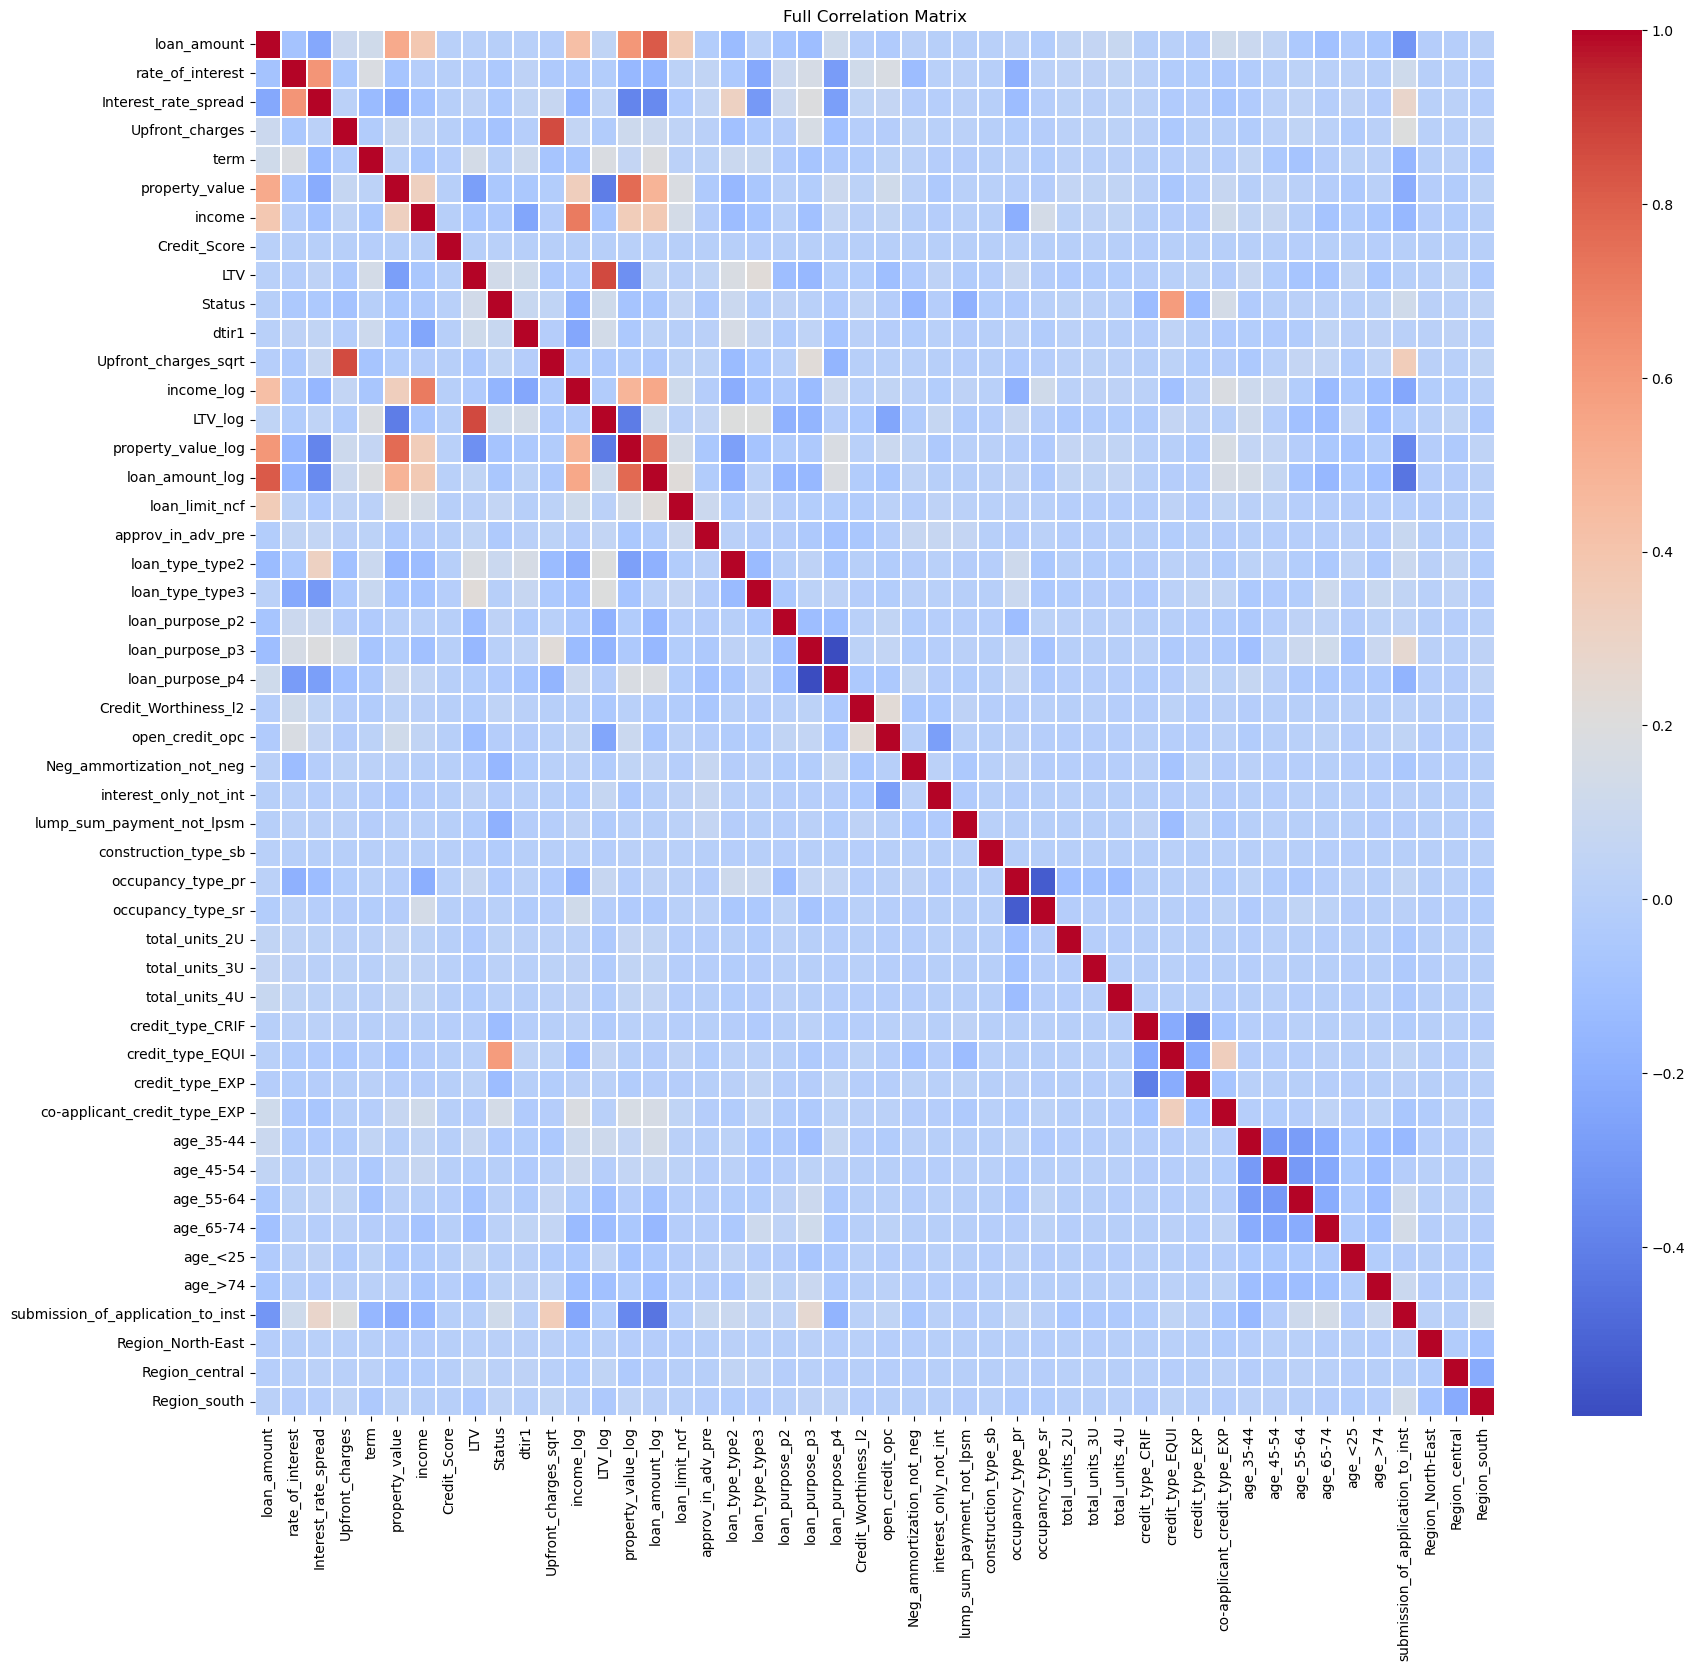


Highly Correlated Pairs (absolute correlation > 0.8):
  loan_amount <-> loan_amount_log: 0.8173
  Upfront_charges <-> Upfront_charges_sqrt: 0.8581
  LTV <-> LTV_log: 0.8665

Correlation with Target Variable 'Status':
Status                               1.000000
credit_type_EQUI                     0.592168
co-applicant_credit_type_EXP         0.144239
LTV                                  0.130001
submission_of_application_to_inst    0.122410
LTV_log                              0.115595
loan_type_type2                      0.092550
dtir1                                0.082432
loan_limit_ncf                       0.053332
Upfront_charges_sqrt                 0.041422
Region_south                         0.040051
Credit_Worthiness_l2                 0.034875
loan_purpose_p2                      0.029369
age_>74                              0.028021
total_units_2U                       0.022978
age_65-74                            0.020665
Region_central                       0.016738


In [45]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Full Correlation Matrix')
plt.show()


highly_correlated_pairs = []
# Iterate through the upper triangle of the correlation matrix to avoid duplicates and self-correlation
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if highly_correlated_pairs:
    print(f"\nHighly Correlated Pairs (absolute correlation > {0.8}):")
    for var1, var2, corr_value in highly_correlated_pairs:
        print(f"  {var1} <-> {var2}: {corr_value:.4f}")
else:
    print(f"\nNo pairs found with absolute correlation > {0.8}.")

if 'Status' in corr_matrix.columns:
    print("\nCorrelation with Target Variable 'Status':")
    print(corr_matrix['Status'].sort_values(ascending=False))

We will later drop the original columns, so there's no need to worry about them.

### Final Check on Transformed Variables
One last check on our log and sqrt transformed features. We'll use boxplots to confirm their distributions look correct before we proceed to scaling and modeling.

Generating boxplots for the following transformed columns: ['Upfront_charges_sqrt', 'income_log', 'LTV_log', 'property_value_log', 'loan_amount_log']


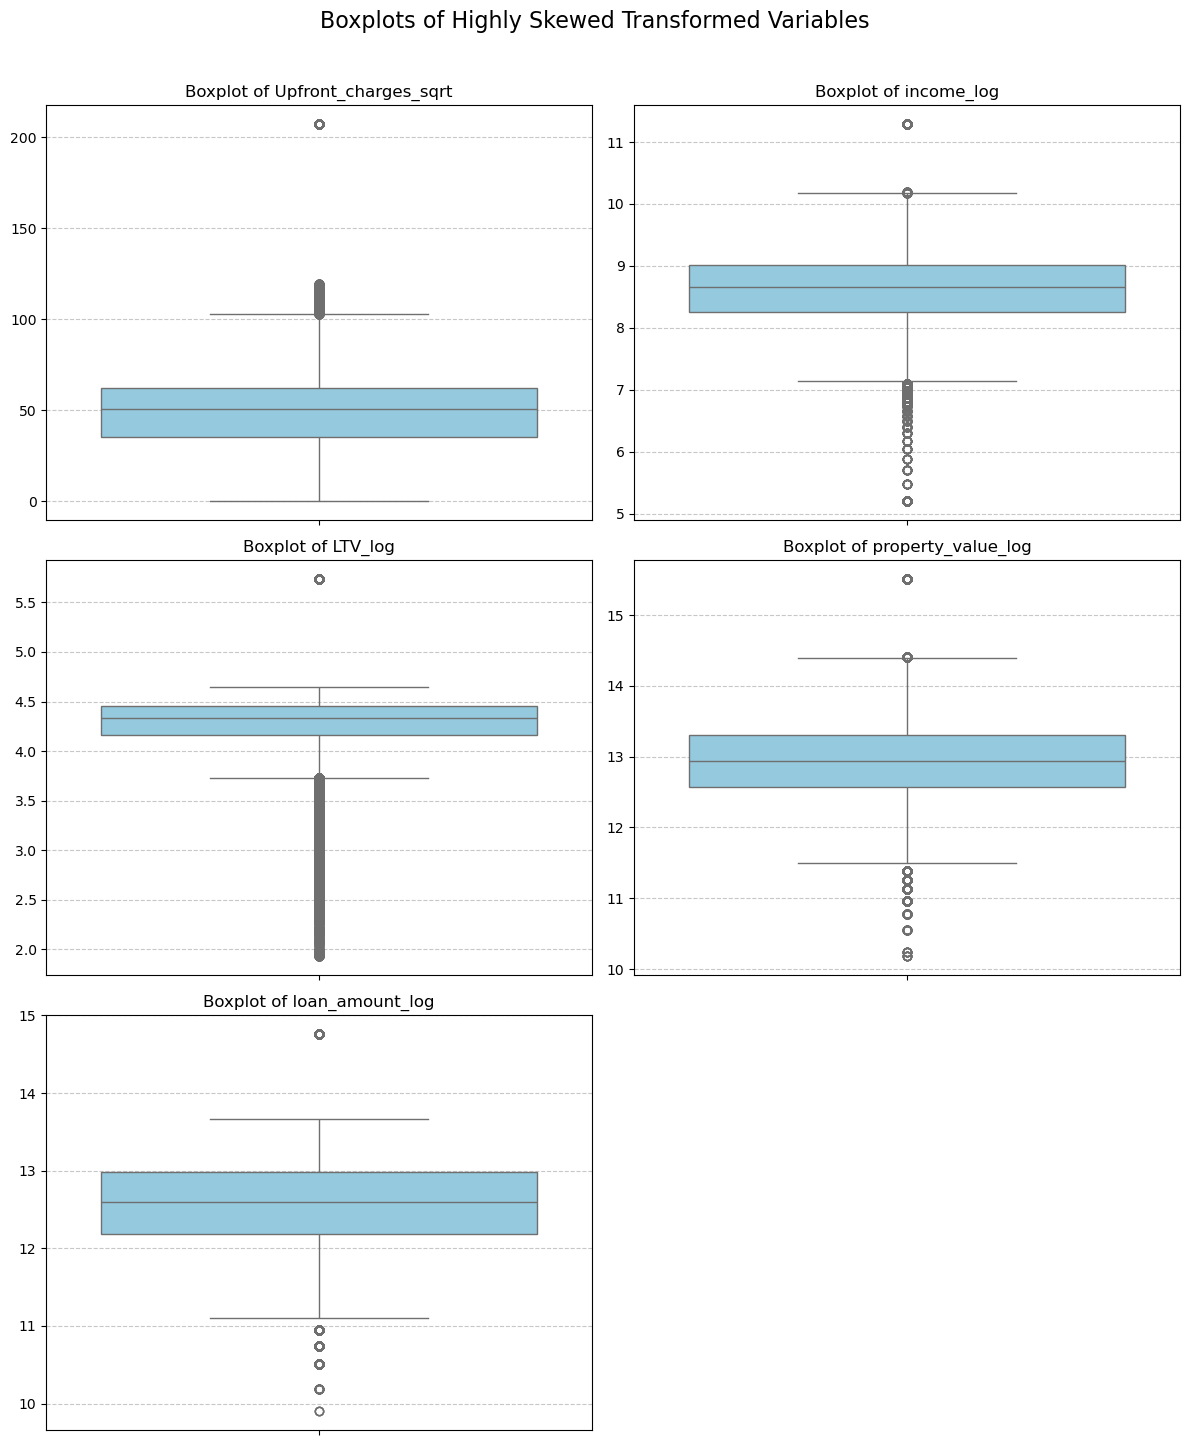


Boxplot generation complete for highly skewed transformed variables.


In [46]:
transformed_skewed_cols = [
    'Upfront_charges_sqrt',
    'income_log',
    'LTV_log',
    'property_value_log',
    'loan_amount_log'
]

# Filter out any columns that might not exist 
existing_transformed_cols = [col for col in transformed_skewed_cols if col in df.columns]

if existing_transformed_cols:
    print(f"Generating boxplots for the following transformed columns: {existing_transformed_cols}")

    num_plots = len(existing_transformed_cols)
    # Determine grid size for subplots
    n_rows = int(np.ceil(num_plots / 2)) # Aim for 2 columns per row
    n_cols = 2 if num_plots > 1 else 1 # Ensure at least 1 column for 1 plot

    plt.figure(figsize=(n_cols * 6, n_rows * 5)) # To adjust figure size dynamically

    for i, column in enumerate(existing_transformed_cols):
        plt.subplot(n_rows, n_cols, i + 1) # Create subplot for each column
        sns.boxplot(y=df[column], color='skyblue') 
        plt.title(f'Boxplot of {column}', fontsize=12)
        plt.ylabel('') # Remove y-label to avoid clutter, as title is already descriptive
        plt.grid(axis='y', linestyle='--', alpha=0.7) 

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.suptitle('Boxplots of Highly Skewed Transformed Variables', fontsize=16, y=0.99)
    plt.show()

print("\nBoxplot generation complete for highly skewed transformed variables.")

### 6. Preparing for Predictive Modeling
Checking for Class Imbalance
Before we build our predictive model, we must check the distribution of our target variable, Status. If one class (e.g., 'No Default') far outnumbers the other ('Default'), our model may become biased. This is called class imbalance. We'll check the value counts and plot them.

Class Distribution of 'Status':
Status
0    112031
1     36639
Name: count, dtype: int64

Class Percentage of 'Status':
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


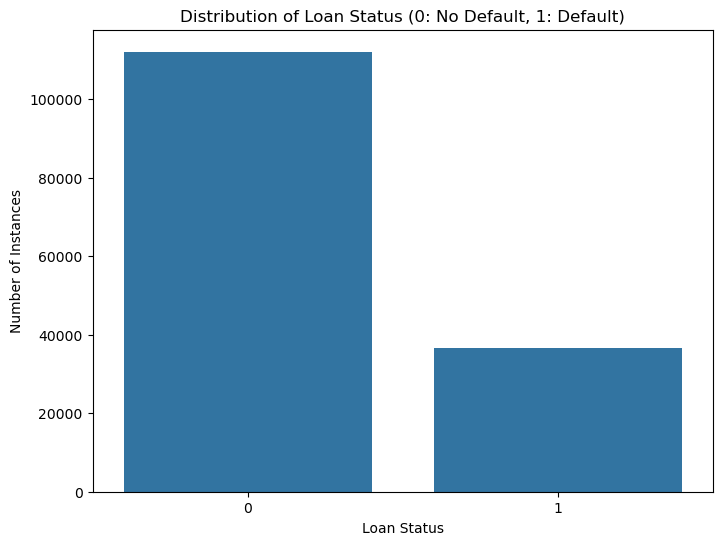

Based on the percentages, there appears to be a significant class imbalance.
The majority class (Status=0) makes up a large portion of the dataset.




In [47]:
class_distribution = df['Status'].value_counts()
print("Class Distribution of 'Status':")
print(class_distribution)

# Calculate the percentage of each class
class_percentage = df['Status'].value_counts(normalize=True) * 100
print("\nClass Percentage of 'Status':")
print(class_percentage)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Loan Status (0: No Default, 1: Default)')
plt.xlabel('Loan Status')
plt.ylabel('Number of Instances')
plt.show()

if class_percentage[0] > 60 and class_percentage[1] < 40: # Example threshold for imbalance
    print("Based on the percentages, there appears to be a significant class imbalance.")
    print("The majority class (Status=0) makes up a large portion of the dataset.")
else:
    print("The classes appear relatively balanced.")

print("\n")

### Installing imbalanced-learn
Since we've identified significant class imbalance, we'll install the imbalanced-learn library. This library provides tools for handling imbalanced datasets, such as SMOTE (Synthetic Minority Over-sampling Technique).

In [48]:
!python -m pip install imbalanced-learn

### Final Missing Value Imputation Check
We'll run one final check for any missing values that might have been missed. It looks like the term column still has nulls, so we'll impute them with the median.

In [49]:
null_counts = df.isnull().sum()

# Filter to show only columns that have at least one null value
columns_with_nulls = null_counts[null_counts > 0]

if not columns_with_nulls.empty:
    print(columns_with_nulls)
    print(f"\nTotal number of null values across all columns: {columns_with_nulls.sum()}")
df['term'].fillna(df['term'].median(), inplace=True)


term    41
dtype: int64

Total number of null values across all columns: 41


C:\Users\Anjali Gangotri\AppData\Local\Temp\ipykernel_43772\86954952.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['term'].fillna(df['term'].median(), inplace=True)


### Splitting, Scaling, and Resampling
This is a critical step in preparing our data for modeling. We will:

Define X and y: Separate our data into features (X) and the target variable (y, which is Status).

Train-Test Split: Split the data into training and testing sets. We'll use stratify=y to ensure the class imbalance is preserved in both sets.

Feature Scaling: Use StandardScaler to scale all our features. We fit_transform on the training data only and transform the test data to prevent data leakage.

Handle Imbalance (SMOTE): Apply SMOTE to the scaled training data only. This creates synthetic examples of the minority class (defaults) to create a balanced training set, which helps the model learn better.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop('Status', axis=1)
# y is the 'Status' column
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nOriginal training set class distribution:")
print(Counter(y_train))
print("Original training set class percentage:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

# Feature Scaling using StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to prevent data leakage
# Then, transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with original column names and indices
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\nMean of X_train_scaled_df (should be close to 0):")
print(X_train_scaled_df.mean().head())
print("\nStandard Deviation of X_train_scaled_df (should be close to 1):")
print(X_train_scaled_df.std().head())

# Step 5: Handle Class Imbalance in Training Set using SMOTE
# Apply SMOTE to the SCALED training data only
# (*SMOTE works with NumPy arrays, so X_train_scaled is fine directly)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_df, y_train)

print("\nResampled training set class distribution (using SMOTE):")
print(Counter(y_train_resampled))
print("Resampled training set class percentage:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)

# X_train_resampled is already a NumPy array, but we can convert it back to DataFrame
# if you prefer working with DataFrames for consistency in subsequent steps.
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train_scaled_df.columns)



Shape of X_train: (104069, 47)
Shape of X_test: (44601, 47)
Shape of y_train: (104069,)
Shape of y_test: (44601,)

Original training set class distribution:
Counter({0: 78422, 1: 25647})
Original training set class percentage:
Status
0    75.355774
1    24.644226
Name: proportion, dtype: float64

Mean of X_train_scaled_df (should be close to 0):
loan_amount             3.017804e-17
rate_of_interest       -6.215175e-16
Interest_rate_spread    1.195173e-16
Upfront_charges         8.288721e-17
term                    4.052188e-16
dtype: float64

Standard Deviation of X_train_scaled_df (should be close to 1):
loan_amount             1.000005
rate_of_interest        1.000005
Interest_rate_spread    1.000005
Upfront_charges         1.000005
term                    1.000005
dtype: float64


c:\Users\Anjali Gangotri\.conda\envs\ML_new\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Resampled training set class distribution (using SMOTE):
Counter({0: 78422, 1: 78422})
Resampled training set class percentage:
Status
0    50.0
1    50.0
Name: proportion, dtype: float64


Now the data is balanced.

## 8. Final Check on Preprocessed Data

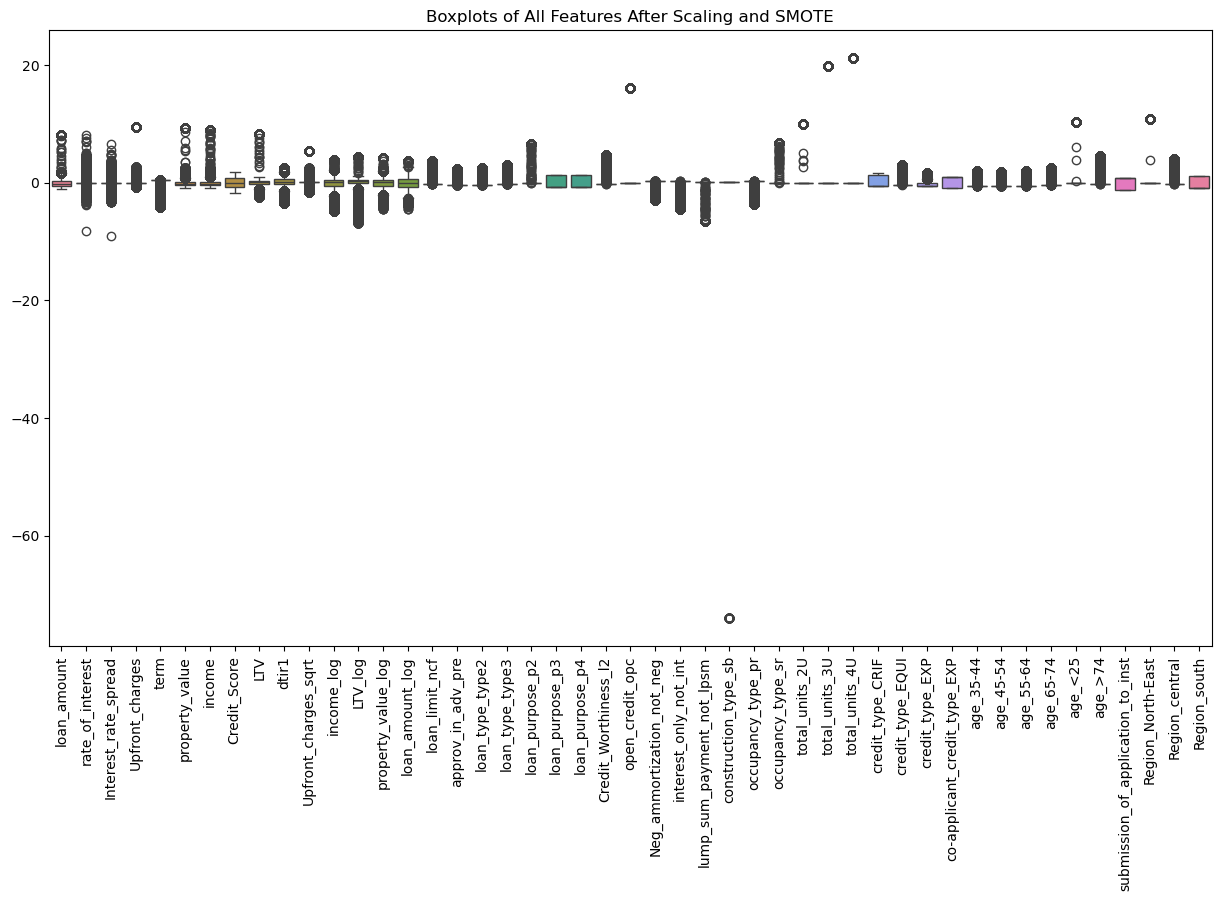

In [52]:
# After scaling and resampling, let's visualize the distributions
# All features should now be on a comparable scale (centered around 0)
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train_resampled_df)
plt.title('Boxplots of All Features After Scaling and SMOTE')
plt.xticks(rotation=90)
plt.show()

#### Scaling Was Successful
All the boxplots are now centered around 0 and share a similar scale. This is a massive improvement from our previous unscaled boxplot plot. Now we can actually compare the distributions of all your features.
#### The outliers that are visible are actually new synthetic data points that are created by SMOTE


Logistic Regression Evaluation Metrics (with custom threshold to DECREASE False Negatives):
Accuracy: 0.8634
Precision: 0.6453
Recall: 0.9899
F1-Score: 0.7813
ROC AUC Score: 0.9767

Classification Report (Logistic Regression with custom threshold):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     33609
           1       0.65      0.99      0.78     10992

    accuracy                           0.86     44601
   macro avg       0.82      0.91      0.84     44601
weighted avg       0.91      0.86      0.87     44601



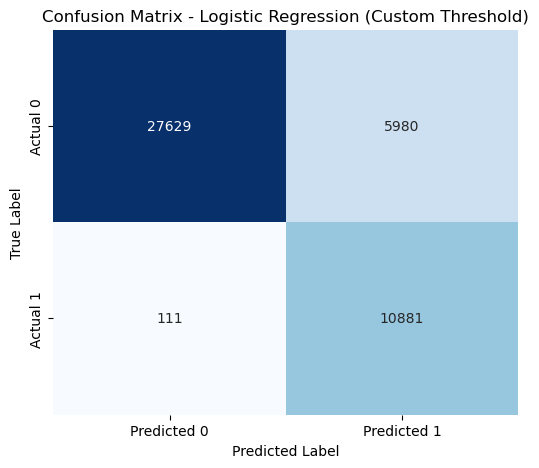


 K-Nearest Neighbors (KNN)

K-Nearest Neighbors Evaluation Metrics:
Accuracy: 0.8385
Precision: 0.6254
Recall: 0.8594
F1-Score: 0.7240
ROC AUC Score: 0.9177

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     33609
           1       0.63      0.86      0.72     10992

    accuracy                           0.84     44601
   macro avg       0.79      0.85      0.80     44601
weighted avg       0.87      0.84      0.85     44601



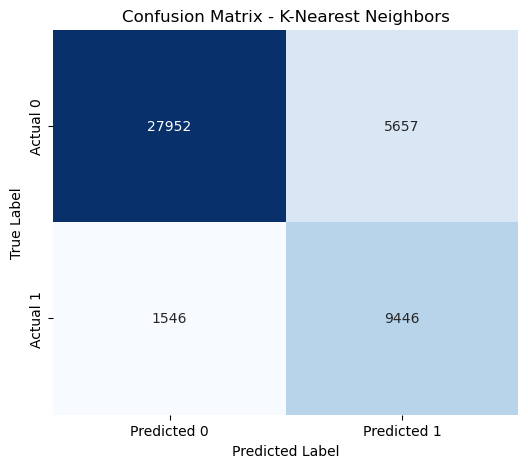

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', max_iter=1000)

# Train the model on the scaled (but NOT SMOTE-resampled) training data
# class_weight='balanced' handles the imbalance for Logistic Regression
log_reg_model.fit(X_train_scaled_df, y_train)

y_proba_log_reg = log_reg_model.predict_proba(X_test_scaled_df)[:, 1] # Probability of the positive class (Status=1)


custom_threshold = 0.35 
y_pred_log_reg = (y_proba_log_reg > custom_threshold).astype(int)


# Evaluate Logistic Regression
print("\nLogistic Regression Evaluation Metrics (with custom threshold to DECREASE False Negatives):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_log_reg):.4f}")

print("\nClassification Report (Logistic Regression with custom threshold):")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression (Custom Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 2. K-Nearest Neighbors (KNN) Model 
print("\n K-Nearest Neighbors (KNN)")

# Initialize KNN model
# A common starting point for n_neighbors is 5, but it can be tuned.
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the SMOTE-resampled and scaled training data
knn_model.fit(X_train_resampled_df, y_train_resampled)

# Make predictions on the scaled (but NOT SMOTE-resampled) test data
y_pred_knn = knn_model.predict(X_test_scaled_df)
y_proba_knn = knn_model.predict_proba(X_test_scaled_df)[:, 1] # Probability of the positive class (Status=1)

# Evaluate KNN
print("\nK-Nearest Neighbors Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_knn):.4f}")

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In our case, a lower accuracy is acceptable because our primary focus is on maximizing recall, not overall correctness.
This is especially important in loan default prediction, where a false negative (predicting someone will repay when they actually default) can lead to significant financial losses for the lender.
By lowering the classification threshold, we prioritize catching more actual defaulters, even if it means mistakenly flagging some safe applicants.
Therefore, although accuracy may drop slightly, a higher recall ensures that the model is more conservative and effective in identifying risky borrowers which aligns with the business goal of minimizing loan default risk even at the cost of extra “false positives.”

## Analysis of the result
### Logistic Regression
On trying multiple values of the probability threshold, from 0.2, 0.25, 0.3 and 0.35, 0.35 turns out to be the best performing. 
Thus, the Logistic Regression model was evaluated using a custom probability threshold of 0.35, which was designed to reduce false negatives while achieving a better overall balance between recall and precision. The model maintains high sensitivity toward loan defaulters but becomes slightly more conservative compared to a lower 0.3 threshold.
### Evaluation metric:
Accuracy: 0.8634

Precision: 0.6453

Recall: 0.9899

F1-Score: 0.7813

ROC-AUC: 0.9767
### Interpretation:
At a threshold of 0.35, the model continues to capture nearly all true defaulters, with a recall of 0.99, but now produces noticeably fewer false positives than the previous thresholds. Precision has improved to 0.65, indicating that a higher proportion of predicted defaulters are actual defaulters. The increase in F1-score and accuracy suggests a stronger overall balance between identifying true defaulters and avoiding unnecessary misclassifications.

The ROC-AUC remains unchanged at 0.9767, confirming consistent model discrimination. The classification report shows that class 0 (non-default) recall has further improved to 0.82 while maintaining perfect precision, and class 1 (default) still exhibits near-complete recall at 0.99.

This means the model is performing well for both majority and minority classes.

### KNN Classifier
#### Evaluation Metrics:

Accuracy: 0.8385

Precision: 0.6254

Recall: 0.8594

F1-Score: 0.7240

ROC-AUC: 0.9177

### Interpretation:
The KNN model demonstrates solid performance with an overall accuracy of 83.8%. The recall value of 0.86 shows that the model successfully identifies a large proportion of actual defaulters, while the precision of 0.63 indicates that around two-thirds of the predicted defaulters are truly default cases. The F1-score of 0.72 reflects a moderate balance between precision and recall.

### Comparison 
Compared to the Logistic Regression model, KNN tends to make fewer false positive predictions but misses a slightly higher number of true defaults. The ROC-AUC score of 0.92 suggests that the model can reliably distinguish between defaulters and non-defaulters, though not as strongly as the logistic regression approach.

### Summary:
-> The KNN model provides a balanced performance between identifying defaulters and maintaining precision, making it suitable for applications that require cautious decision-making without heavily overpredicting risk. While it does not outperform logistic regression in recall or ROC-AUC, it offers a more conservative and interpretable baseline model for comparison within the loan default prediction framework. 

-> However, if the bussiness goal is to strictly flag all defaulters, then the logistic regression model performs better.